<p style="font-size:3em">Predict buildings' energy consumption needs </p>

<br/>

This notebook corresponds to the first part of the **4th project of my data scientist path** with **OpenClassrooms/CentralSupelec** 

This project aims to provide the necessary skills to implement and optimise a supervised regression model 

This notebook contains the following steps:<br/>

* Exploratory Data Analysis:
    * Merge the two provided dataset (2015 + 2016)
    * Select Target features
    * Study potential duplicates values between 2015 and 2016
    * Study potential outliers
* Implement a data cleaning/transformation process: 
    * Drop useless features
    * Handle NaNs
    * Feature engineering (new features creation)
    * Categorical feature encoding (OneHotEncoding and TargetEncoding)
    * Creation of a cleaning pipeline for repeatability
* Save a final train and test dataset (cleaned with the above mentionned pipeline)

___
<b>I strongly recommend to use the 'table of content' extension of Jupyter to navigate through this notebook </b>

# Imports

In [2]:
#import packages
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy import spatial,stats
import category_encoders as ce
import folium

In [3]:
data_2015= pd.read_csv("2015.csv")
data_2016= pd.read_csv("2016.csv")

pd.set_option('display.max_columns', 50)

# Overview data 2015/2016

In [13]:
print('data 2015:\n{} lignes\n{} colonnes\n'.format(data_2015.shape[0],data_2015.shape[1]))
print('data 2016:\n{} lignes\n{} colonnes'.format(data_2016.shape[0],data_2016.shape[1]))

data 2015:
3340 lignes
47 colonnes

data 2016:
3376 lignes
46 colonnes


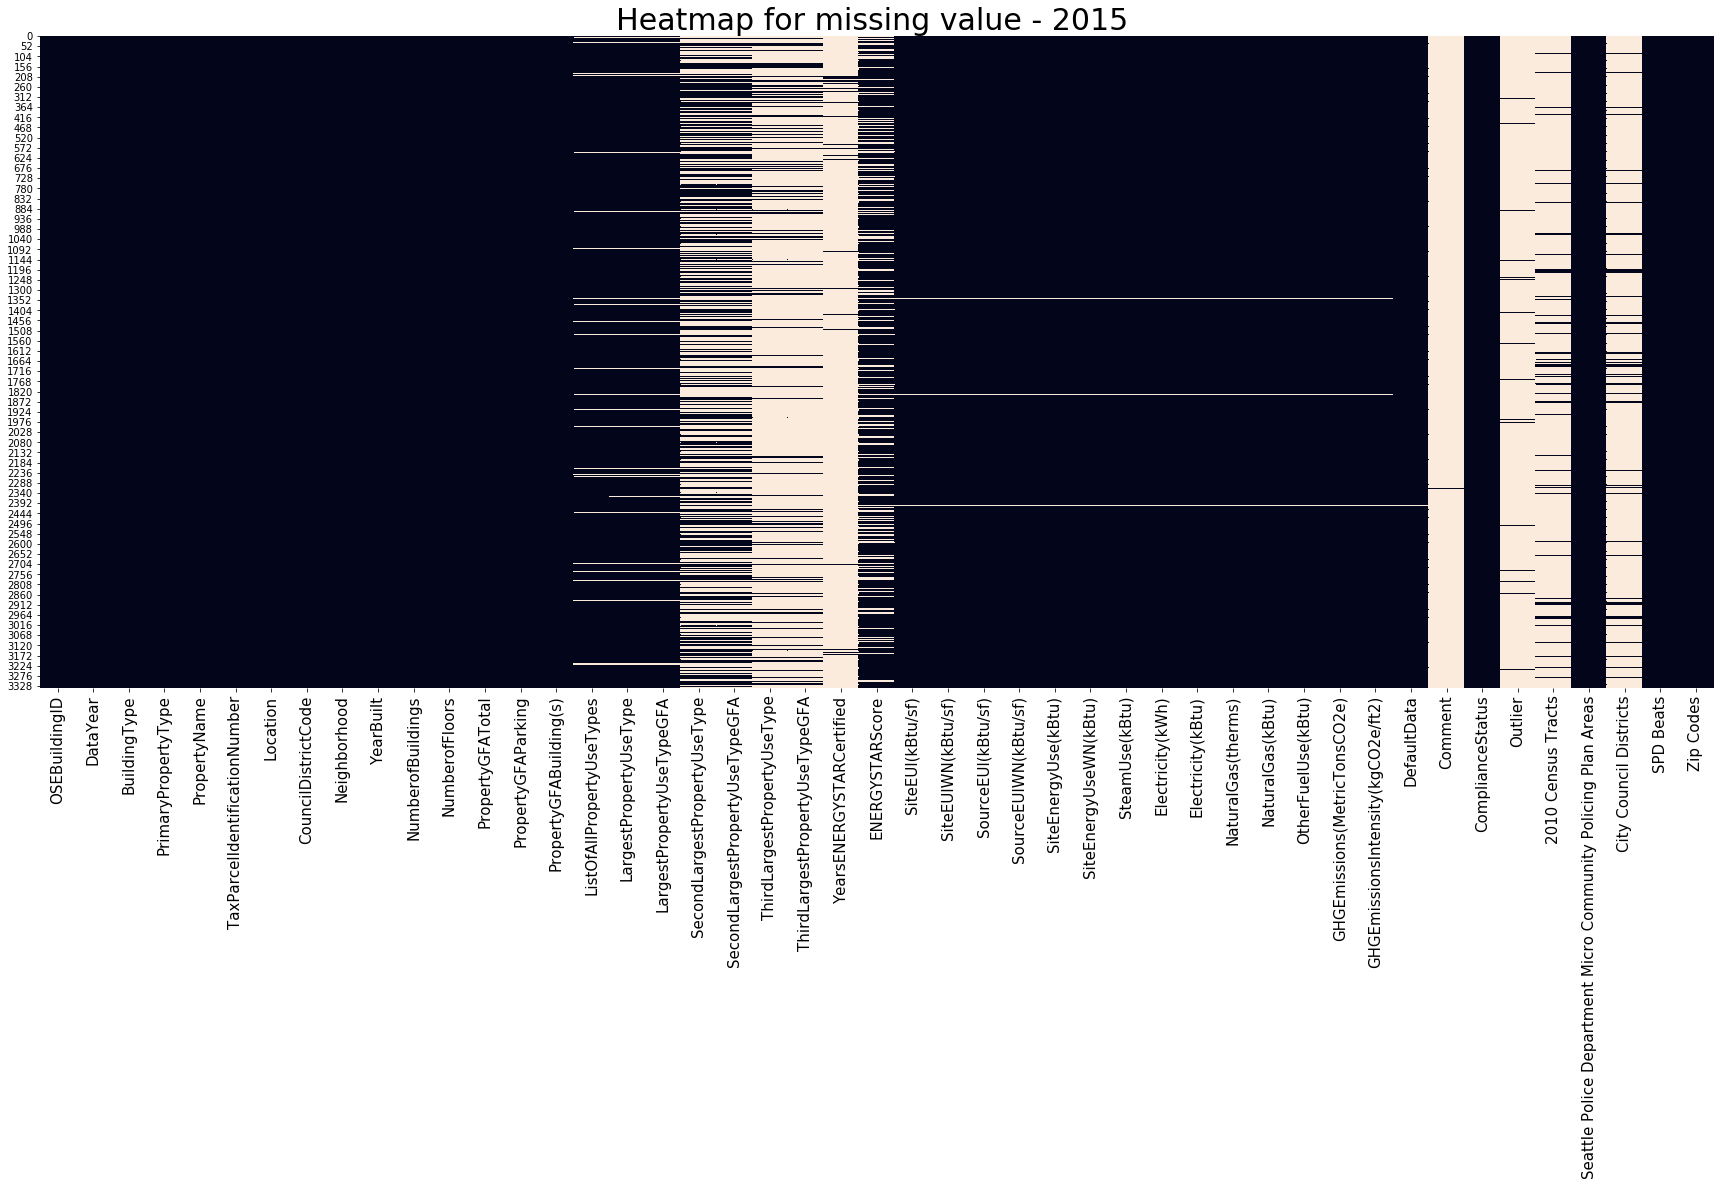

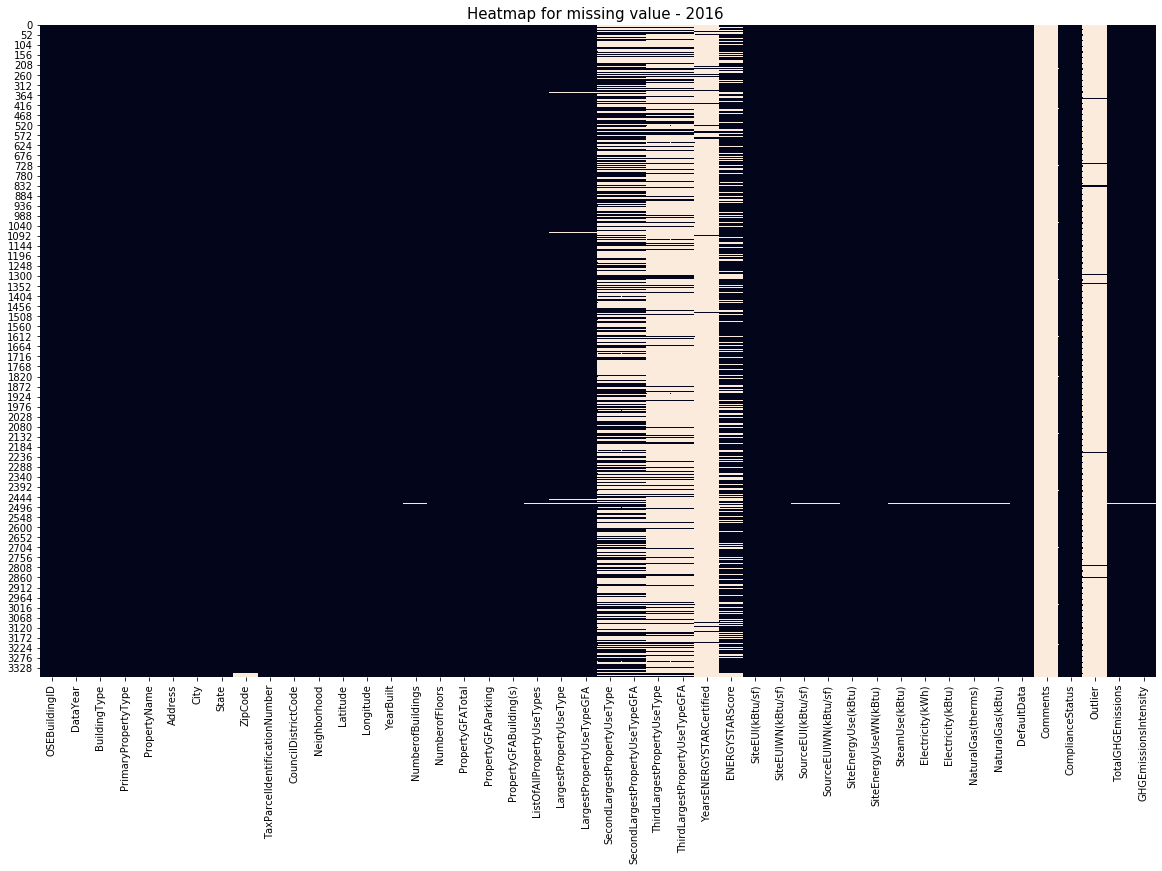

In [34]:
plt.figure(figsize=[30,12])
plt.title('Heatmap for missing value - 2015 ',fontsize=30)
chart = sns.heatmap(data_2015.isna(),cbar=False)
chart.set_xticklabels(chart.get_xticklabels(),fontsize=15)
plt.figure(figsize=[20,12])
plt.title('Heatmap for missing value - 2016 ',fontsize=15)
sns.heatmap(data_2016.isna(),cbar=False)

In [7]:
data_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [8]:
data_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [9]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [48]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [10]:
data_2016.Outlier.unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [11]:
data_2016['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'High-Rise Multifamily',
       'Office'], dtype=object)

In [12]:
data_2016['ListOfAllPropertyUseTypes'].unique()

array(['Hotel', 'Hotel, Parking, Restaurant',
       'Hotel, Parking, Swimming Pool', 'Police Station',
       'Other - Entertainment/Public Assembly', 'Multifamily Housing',
       'Hotel, Parking', 'Data Center, Library, Parking',
       'Fitness Center/Health Club/Gym, Office, Swimming Pool',
       'Office, Other, Other - Lodging/Residential, Restaurant, Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership',
       'Hotel, Parking, Retail Store, Swimming Pool',
       'K-12 School, Multifamily Housing, Office, Other - Entertainment/Public Assembly',
       'Self-Storage Facility',
       'Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office',
       'Non-Refrigerated Warehouse, Office, Refrigerated Warehouse',
       'Non-Refrigerated Warehouse, Office', 'Office, Other - Education',
       'Office, Self-Storage Facility, Vocational School',
       'Data Center, Office, 

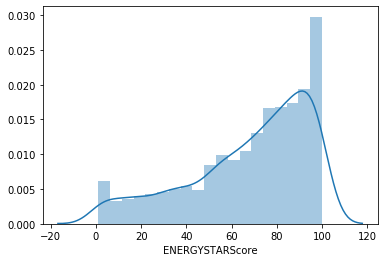

In [13]:
sns.distplot(data_2016['ENERGYSTARScore'])

In [14]:
data_2016['ENERGYSTARScore'].describe()

count    2533.000000
mean       67.918674
std        26.873271
min         1.000000
25%        53.000000
50%        75.000000
75%        90.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

# Merge 2015 and 2016

## Find out the differences between the two dataset

In [4]:
# Look at columns showing in both 2015 and 2016
data_2015.columns.intersection(data_2016.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'Outlier'],
      dtype='object')

In [5]:
# Look at data in 2015 not showing in 2016
data_2015.columns.difference(data_2016.columns)

Index(['2010 Census Tracts', 'City Council Districts', 'Comment',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Location', 'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'],
      dtype='object')

In [6]:
# Look at data in 2016 not showing in 2015
data_2016.columns.difference(data_2015.columns)

Index(['Address', 'City', 'Comments', 'GHGEmissionsIntensity', 'Latitude',
       'Longitude', 'State', 'TotalGHGEmissions', 'ZipCode'],
      dtype='object')

___
We can observ that a fiew columns appear to have the same content but a small difference in their name :
   * Zip Codes and ZipCode
   * GHGEmissionsIntensity(kgCO2e/ft2) and GHGEmissionsIntensity
   * Comment and Comments 
   * TotalGHGEmissions and GHGEmissions(MetricTonsCO2e)
    
Let's rename theim so as to keep only the true difference between the two dataset 

In [7]:
data_2015.rename(columns = {'Zip Codes':'ZipCode','GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'
                            ,'Comment':'Comments'}, inplace = True)
data_2016.rename(columns = {'TotalGHGEmissions':'GHGEmissions(MetricTonsCO2e)'}, inplace = True)

___
Overview of the following feature for both 2015 and 2016 (to see of they have the same order of magnitude): 

- GHGEmissionsIntensity
- GHGEmissions(MetricTonsCO2e)

In [78]:
data_2015.GHGEmissionsIntensity.describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity, dtype: float64

In [79]:
data_2016.GHGEmissionsIntensity.describe()

count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

In [9]:
data_2015['GHGEmissions(MetricTonsCO2e)'].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [10]:
data_2016['GHGEmissions(MetricTonsCO2e)'].describe()

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

The magnitude of our feature are almost the same, our modifications look relevant 

In [16]:
data_2015.columns.intersection(data_2016.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'DefaultData', 'Comments',
       'ComplianceStatus', 'Outlier', 'ZipCode'],
      dtyp

In [17]:
data_2015.columns.difference(data_2016.columns)

Index(['2010 Census Tracts', 'City Council Districts', 'Location',
       'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas'],
      dtype='object')

In [18]:
data_2016.columns.difference(data_2015.columns)

Index(['Address', 'City', 'Latitude', 'Longitude', 'State'], dtype='object')

In [19]:
data_2015.Location[0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

___
Here we can see tha the 'location' feature of data_2015 contains the 5 remaining feature of data_2016

Also we cans see that the other features in 2015 not appearing in 2016 can be dropped :
 * 2010 Census Tracts
 * City Council Districts
 * OtherFuelUse(kBtu)
 * SPD Beats
 * Seattle Police Department Micro Community Policing Plan Areas
___

In [21]:
#Let's remove columns from data_2015 not showing in data_2016 (and keep location feature of course)
to_remove= data_2015.columns.difference(data_2016.columns)
to_remove= to_remove.drop('Location')
data_2015.drop(columns=to_remove,inplace=True)

## Modify 'Location' feature from data_2015 

In [23]:
# Transform the string version of dictionnary contained the 'location' feature into a real dictionnary 
data_2015['Location']=data_2015['Location'].apply(eval)


In [24]:
# Create a new dataframe with one column per dictionnary's key 
location = data_2015["Location"].apply(pd.Series )

# Let's do the same pattern with the new found 'human_address' feature which is also a string version of dictionnary:
# First turn the string into real dictionnary
location['human_address']=location['human_address'].apply(eval)

# Then add one column per dictionnary key to the location dataframe (with dropping the human_address feature)
location= pd.concat([location.drop(['human_address'], axis=1), location['human_address'].apply(pd.Series)], axis=1)

# In data_2016 first letter of each feature is capitilized
# let's modify our feature before concatenated them with the 2015 dataframe
location.columns = map(str.capitalize, location.columns)

# We already have a zip code, we do not need this one here 
location.drop(columns='Zip',inplace=True)
location

,Latitude,Longitude,Address,City,State
0,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA
1,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA
2,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA
3,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA
4,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA
...,...,...,...,...,...
3335,47.59950256,-122.32034302,321 10TH AVE S,SEATTLE,WA
3336,47.65752471,-122.3160159,4123 12TH AVE NE,SEATTLE,WA
3337,47.61649845,-122.33770787,2030 8TH AVE,SEATTLE,WA
3338,47.68396954,-122.2874088,3801 NE 77TH ST,SEATTLE,WA


In [25]:
# Final step, adding the 'splitted' location to data_2015 and removing the old location feature
data_2015= pd.concat([data_2015.drop(['Location'], axis=1), location], axis=1)


___
Checking the remaining columns differences between the two tables 
___

In [26]:
data_2015.columns.difference(data_2016.columns)

Index([], dtype='object')

In [27]:
data_2016.columns.difference(data_2015.columns)

Index([], dtype='object')

In [28]:
data_2015.columns.intersection(data_2016.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'DefaultData', 'Comments',
       'ComplianceStatus', 'Outlier', 'ZipCode', 'Latitude',

In [29]:
# Now that we have two tables with same configuration let's merge them 
data =  pd.concat([data_2015, data_2016], ignore_index=True)
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,DefaultData,Comments,ComplianceStatus,Outlier,ZipCode,Latitude,Longitude,Address,City,State
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,...,No,NaN,Compliant,NaN,18081.0,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,...,No,NaN,Compliant,NaN,18081.0,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,...,Yes,NaN,Compliant,NaN,18081.0,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,...,No,NaN,Compliant,High Outlier,18081.0,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,...,No,NaN,Compliant,NaN,19576.0,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.0,...,True,NaN,Error - Correct Default Data,NaN,NaN,47.5672,-122.312,1600 S Dakota St,Seattle,WA
6712,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,...,False,NaN,Compliant,NaN,NaN,47.5962,-122.323,719 8th Ave S,Seattle,WA
6713,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,...,False,NaN,Compliant,NaN,NaN,47.6364,-122.358,1920 1st Ave W,Seattle,WA
6714,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,1,GREATER DUWAMISH,1989,1.0,...,False,NaN,Compliant,NaN,NaN,47.5283,-122.324,8319 8th Ave S,Seattle,WA


In [30]:
# First save of the merge table so as to study it

data.to_csv (r'C:\Users\quent\Desktop\Formation_OCR\Projets\Projet_4\data_merged.csv', index = False, header=True)

# Data cleaning before train/test split

In [12]:
data= pd.read_csv("data_merged.csv")
# data.rename(columns = {'TotalGHGEmissions':'GHGEmissions(MetricTonsCO2e)'}, inplace = True)

In [41]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,DefaultData,Comments,ComplianceStatus,Outlier,ZipCode,Latitude,Longitude,Address,City,State
0,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,...,No,NaN,Compliant,High Outlier,18081.0,47.614216,-122.336609,620 STEWART ST,SEATTLE,WA
1,10,2015,NonResidential,Hotel,CAMLIN WORLDMARK HOTEL,660000825,7,DOWNTOWN,1926,1.0,...,No,NaN,Compliant,NaN,18081.0,47.614114,-122.332741,1619 9TH AVE,SEATTLE,WA
2,12,2015,NonResidential,Hotel,COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE,939000080,7,DOWNTOWN,1904,1.0,...,No,NaN,Compliant,NaN,18379.0,47.602589,-122.332553,612 2ND AVE,SEATTLE,WA
3,15,2015,NonResidential,Hotel,HOTEL MONACO,942000145,7,DOWNTOWN,1969,1.0,...,No,NaN,Compliant,NaN,18081.0,47.607121,-122.334319,1101 4TH AVE,SEATTLE,WA
4,21,2015,Nonresidential COS,Other,SEATTLE CENTRAL LIBRARY,942000275,7,DOWNTOWN,2004,1.0,...,No,NaN,Compliant,NaN,18379.0,47.606675,-122.332264,1000 4TH AVE,SEATTLE,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.0,...,True,NaN,Error - Correct Default Data,NaN,NaN,47.567220,-122.311540,1600 S Dakota St,Seattle,WA
4739,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,...,False,NaN,Compliant,NaN,NaN,47.596250,-122.322830,719 8th Ave S,Seattle,WA
4740,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,...,False,NaN,Compliant,NaN,NaN,47.636440,-122.357840,1920 1st Ave W,Seattle,WA
4741,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,1,GREATER DUWAMISH,1989,1.0,...,False,NaN,Compliant,NaN,NaN,47.528320,-122.324310,8319 8th Ave S,Seattle,WA


## Target Selection 

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   TaxParcelIdentificationNumber    6714 non-null   object 
 6   CouncilDistrictCode              6716 non-null   int64  
 7   Neighborhood                     6716 non-null   object 
 8   YearBuilt                        6716 non-null   int64  
 9   NumberofBuildings                6708 non-null   float64
 10  NumberofFloors                   6708 non-null   float64
 11  PropertyGFATotal                 6716 non-null   int64  
 12  PropertyGFAParking  

___
Potential Targets : 

1) Consumption 

- SiteEUI(kBtu/sf)
- SiteEUIWN(kBtu/sf) 
- SourceEUI(kBtu/sf)               
- SourceEUIWN(kBtu/sf)             
- SiteEnergyUse(kBtu) 
- SiteEnergyUseWN(kBtu)    
- SteamUse(kBtu)                   
- Electricity(kWh)                 
- Electricity(kBtu)               
- NaturalGas(therms)               
- NaturalGas(kBtu)                 

2) Emissions 

- GHGEmissions(MetricTonsCO2e)                 
- GHGEmissionsIntensity            
___

After looking at the documentation (https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy), we will use the following targets : 

1) Site Energy Use WN (KBtu)  (average estimation of consumption for a 30-year average weather condition) 

2) GHGEmissions(MetricTonsCO2e)

And drop the other consumption/emission feature to prevent any data leakage from occuring

In [161]:
data.drop(columns=['SiteEUI(kBtu/sf)',
                    'SiteEUIWN(kBtu/sf)', 
                    'SourceEUI(kBtu/sf)',              
                    'SourceEUIWN(kBtu/sf)',            
                    'SiteEnergyUse(kBtu)',
                    'SteamUse(kBtu)',                   
                    'Electricity(kWh)',                 
                    'Electricity(kBtu)',              
                    'NaturalGas(therms)',               
                    'NaturalGas(kBtu)',
                    'GHGEmissionsIntensity'],inplace=True)

## Study Duplicates between 2015 & 2016 

Study potential duplicates between 2015 and 2016 to prevent data leakage between train and test sets

In [19]:
study_duplicates = pd.read_csv("data_merged.csv")
study_duplicates

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,ZipCode,Latitude,Longitude,Address,City,State
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3.686160e+06,12724.000000,1.272388e+06,249.43,2.64,No,NaN,Compliant,NaN,18081.0,47.612190,-122.337997,405 OLIVE WAY,SEATTLE,WA
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3.905411e+06,44490.000000,4.448985e+06,263.51,2.38,No,NaN,Compliant,NaN,18081.0,47.613106,-122.333358,724 PINE ST,SEATTLE,WA
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.600000,99.700000,242.700000,246.500000,7.313066e+07,7.550627e+07,19660404.0,1.458393e+07,4.976244e+07,37099.000000,3.709900e+06,2061.48,1.92,Yes,NaN,Compliant,NaN,18081.0,47.613349,-122.337699,1900 5TH AVE,SEATTLE,WA
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.400000,462.500000,636.300000,643.200000,2.822932e+07,2.836344e+07,23458518.0,8.115210e+05,2.769023e+06,20019.000000,2.001894e+06,1936.34,31.38,No,NaN,Compliant,High Outlier,18081.0,47.614216,-122.336609,620 STEWART ST,SEATTLE,WA
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.100000,122.100000,228.800000,227.100000,1.482910e+07,1.507824e+07,0.0,1.777841e+06,6.066245e+06,87631.000000,8.763105e+06,507.70,4.02,No,NaN,Compliant,NaN,19576.0,47.613754,-122.340924,401 LENORA ST,SEATTLE,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,True,NaN,Error - Correct Default Data,NaN,NaN,47.567220,-122.311540,1600 S Dakota St,Seattle,WA
6712,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,False,NaN,Compliant,NaN,NaN,47.596250,-122.322830,719 8th Ave S,Seattle,WA
6713,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,

In [90]:
# Here we will use OSEBuildingID to observe which building are in both 2015 and 2016 study 

study_duplicates = study_duplicates[study_duplicates['OSEBuildingID'].map(study_duplicates['OSEBuildingID'].value_counts()) > 1]
study_duplicates['OSEBuildingID'].value_counts().describe()

count    3284.0
mean        2.0
std         0.0
min         2.0
25%         2.0
50%         2.0
75%         2.0
max         2.0
Name: OSEBuildingID, dtype: float64

### Emission 

In [94]:
# Let's create a table showing the target difference (in percent) between 2015 and 2016 for emission 
view_emission = study_duplicates.groupby('OSEBuildingID')['TotalGHGEmissions'].agg(['max','min'])
view_emission['diff_perc']=(view_emission['max']-view_emission['min'])/view_emission['max']*100
view_emission

,max,min,diff_perc
OSEBuildingID,,,
1,7.226362e+06,6981428.0,3.389458
2,8.387933e+06,8354235.0,0.401744
3,7.313066e+07,72587024.0,0.743371
5,2.822932e+07,6794584.0,75.930756
8,1.482910e+07,14172606.0,4.427059
...,...,...,...
50049,1.248599e+06,1142949.0,8.461484
50055,1.625696e+06,1543282.0,5.069445
50057,1.683441e+07,15404161.0,8.496007


Ecarts des émissions: 
 count    3283.000000
mean        9.968958
std        14.048555
min         0.000000
25%         2.418207
50%         5.483828
75%        11.322411
max       120.408163
Name: diff_perc, dtype: float64


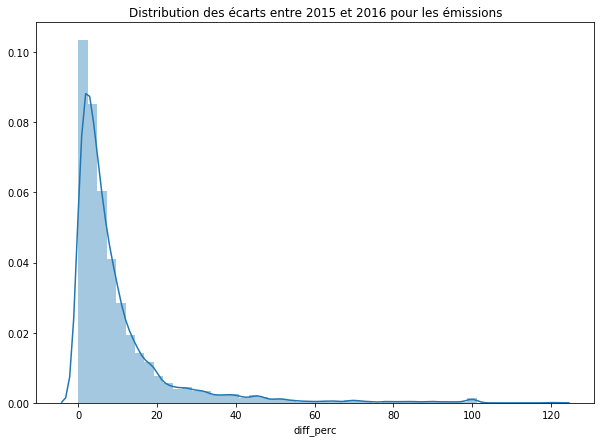

In [92]:
# Let's observe the distribution of emission's difference between 2015 and 2016 

print('Ecarts des émissions: \n',view_emission['diff_perc'].describe())


plt.figure(figsize=[10,7])
plt.title('Distribution des écarts entre 2015 et 2016 pour les émissions')
sns.distplot(view_emission['diff_perc'])

In [93]:
ten_perc_e = view_emission[view_emission['diff_perc']<10]
ten_perc_e.index

Int64Index([    1,     3,     8,     9,    16,    17,    18,    19,    24,
               32,
            ...
            49996, 49997, 50001, 50002, 50009, 50028, 50038, 50055, 50058,
            50059],
           dtype='int64', name='OSEBuildingID', length=1523)

### Consumption 

In [91]:
# Let's create a table showing the target difference (in percent) between 2015 and 2016 for consumption 
view_consumption = study_duplicates.groupby('OSEBuildingID')['SiteEnergyUse(kBtu)'].agg(['max','min'])
view_consumption['diff_perc']=(view_consumption['max']-view_consumption['min'])/view_consumption['max']*100
view_consumption

,max,min,diff_perc
OSEBuildingID,,,
1,249.98,249.43,0.220018
2,295.86,263.51,10.934226
3,2089.28,2061.48,1.330602
5,1936.34,286.43,85.207660
8,507.70,505.01,0.529840
...,...,...,...
50049,8.70,7.97,8.390805
50055,31.46,30.69,2.447552
50057,627.97,395.26,37.057503


Ecarts des consommations: 
 count    3282.000000
mean        8.117183
std        12.551465
min         0.000000
25%         1.949766
50%         4.280960
75%         8.967298
max       100.000000
Name: diff_perc, dtype: float64


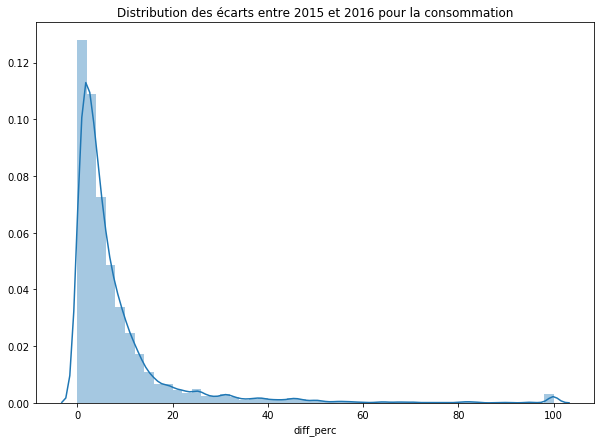

In [95]:
# Let's observe the distribution of consumption's difference between 2015 and 2016 

print('Ecarts des consommations: \n',view_consumption['diff_perc'].describe())


plt.figure(figsize=[10,7])
plt.title('Distribution des écarts entre 2015 et 2016 pour la consommation')
sns.distplot(view_consumption['diff_perc'])

In [96]:
ten_perc_c = view_consumption[view_consumption['diff_perc']<10]
ten_perc_c.index

Int64Index([    1,     2,     3,     8,     9,    11,    13,    16,    17,
               18,
            ...
            49985, 49996, 49997, 50002, 50009, 50028, 50033, 50038, 50058,
            50059],
           dtype='int64', name='OSEBuildingID', length=1799)

___ 
The idea here is for us to drop all buildings in 2015 that have 10% or less difference with 2016 for either consumption or emission

=> The purpose of this action is to try to prevent having duplicates in our dataset, which would be "too easy to predict" later on 

In [97]:
# Let's create a list of Building ID which is the union of building that have :
# less that 10% of difference between 2015 and 2016 for either consumption or emission

list_ID =ten_perc_e.index[~ten_perc_e.index.isin(ten_perc_c.index)].tolist()+ten_perc_c.index.tolist()
len(list_ID)

1921

In [98]:
data.shape[0]

6716

In [99]:
# Here we drop building in 2015 that appear in the list we just created 

data=data.loc[~((data['DataYear']==2015)&(data['OSEBuildingID'].isin(list_ID)))]
data.shape[0]

4795

## Clean data observations based on targets 

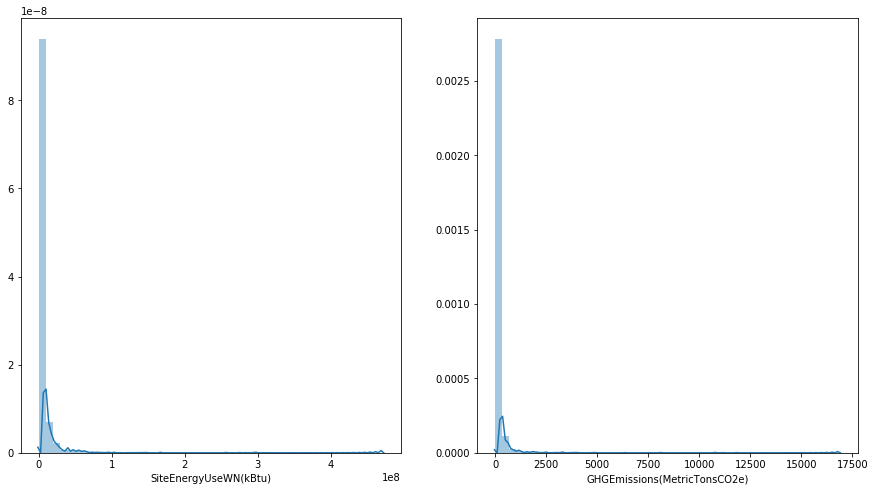

In [116]:
fig, axs = plt.subplots(1,2,figsize=(15,8))
 
sns.distplot(data['SiteEnergyUseWN(kBtu)'],ax=axs[0])
sns.distplot(data['GHGEmissions(MetricTonsCO2e)'],ax=axs[1])


plt.show()

In [57]:
print('--------------------------------\nSiteEnergyUseWN(kBtu)\n--------------------------------\n',
      data['SiteEnergyUseWN(kBtu)'].describe(),'\n')

print('--------------------------------\nGHGEmissions(MetricTonsCO2e)\n--------------------------------\n',
      data['GHGEmissions(MetricTonsCO2e)'].describe())

--------------------------------
SiteEnergyUseWN(kBtu)
--------------------------------
 count    6.700000e+03
mean     5.240110e+06
std      1.500896e+07
min      0.000000e+00
25%      9.818029e+05
50%      1.926136e+06
75%      4.377974e+06
max      4.716139e+08
Name: SiteEnergyUseWN(kBtu), dtype: float64 

--------------------------------
GHGEmissions(MetricTonsCO2e)
--------------------------------
 count     6697.000000
mean       114.935638
std        478.876573
min         -0.800000
25%          9.450000
50%         33.180000
75%         91.530000
max      16870.980000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64


### Study outliers (see what should be dropped)

Look for outliers or irrelevant values

=> We will observe lowest and highest values for both consumption and emission 

In [76]:
# To have a better view on the rows we will observ, let's create a list of useful columns we will keep for observation
column_tosee=['PrimaryPropertyType',
              'YearBuilt',
              'PropertyGFATotal',
              'NumberofBuildings',
              'NumberofFloors',
              'SiteEnergyUseWN(kBtu)',
              'GHGEmissions(MetricTonsCO2e)']

#### Emissions low outlier

We will use the same method for each part of this study : 

We need to determine the elbow value (the percentile where the target value increase/decrease drasticly) to help us figure out which percentile value to observe

Text(0.5, 0, 'percentile value')

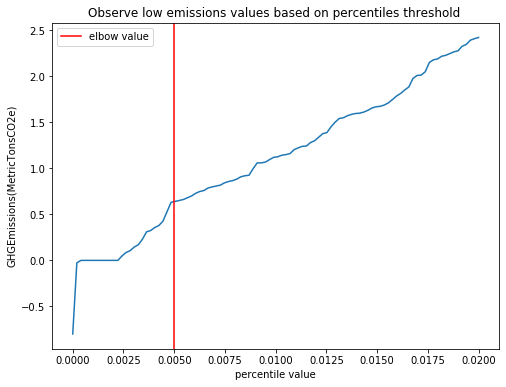

In [100]:
# The purpose of this section is to plot emission value for low percentile 
# We want to determine the percentile treshold to observ in detail

# For example if we find out an elbow for the 0.5th percentile, 
# we will observe in detail all buildings with emission below this 0.5th percentile to spot irrelevent values

a = np.linspace(0, 0.02, num = 100)
emissionlowq = data['GHGEmissions(MetricTonsCO2e)'].quantile(a)

plt.figure(figsize=[8,6])
sns.lineplot(x=a,y=emissionlowq)
plt.title('Observe low emissions values based on percentiles threshold ')

# the elbow value has been set based on lineplot observation 
elbow=0.005
plt.axvline(x=elbow,color='r',label='elbow value')
plt.legend()
plt.xlabel('percentile value')

In [101]:
outliers_lowemissions =data.loc[(data['GHGEmissions(MetricTonsCO2e)']<data['GHGEmissions(MetricTonsCO2e)'].quantile(elbow))]

In [102]:
outliers_lowemissions[column_tosee].sort_values(by='GHGEmissions(MetricTonsCO2e)', ascending=True)

,PrimaryPropertyType,YearBuilt,PropertyGFATotal,NumberofBuildings,NumberofFloors,SiteEnergyUseWN(kBtu),GHGEmissions(MetricTonsCO2e)
6546,Small- and Mid-Sized Office,2013,52000,1.0,6.0,2.401321e+05,-0.80
44,Retail Store,1920,57428,1.0,2.0,0.000000e+00,0.00
4889,Low-Rise Multifamily,1988,47647,1.0,4.0,0.000000e+00,0.00
4701,K-12 School,1954,42292,1.0,1.0,0.000000e+00,0.00
4663,Low-Rise Multifamily,1974,37361,1.0,4.0,9.197677e+05,0.00
4100,Other,1909,30700,1.0,3.0,0.000000e+00,0.00
3853,Supermarket / Grocery Store,2008,57176,1.0,1.0,1.284386e+07,0.00
3644,Other,1990,1400000,1.0,6.0,0.000000e+00,0.00
4086,Other,2002,29924,1.0,1.0,0.000000e+00,0.00
3368,K-12 School,1955,126351,1.0,1.0,0.000000e+00,0.00


After checking, the only values we can drop here are the one equal to zero, we have no way to determine if other values are irrelevant 

In [106]:
# removing 11 NaNs + 12 values equal or below to 0 

data= data.loc[data['GHGEmissions(MetricTonsCO2e)']>0]
data.shape[0]

4772

#### Emissions high outlier

Text(0.5, 0, 'percentile value')

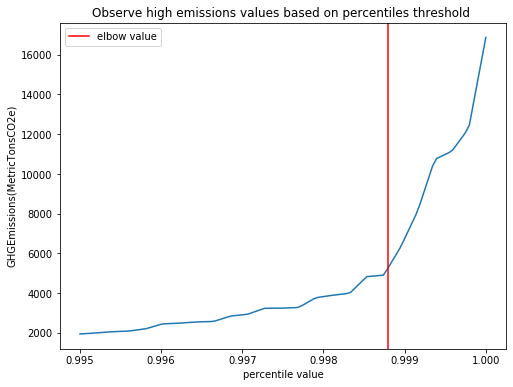

In [107]:
# Same method as emission low outlier (section 4.3.1.1) except that we are looking at high outliers 
b = np.linspace(0.995, 1, num = 100)
emissionhighq = data['GHGEmissions(MetricTonsCO2e)'].quantile(b)

plt.figure(figsize=[8,6])

sns.lineplot(x=b,y=emissionhighq)
plt.title('Observe high emissions values based on percentiles threshold ')
elbow=0.9988
plt.axvline(x=elbow,color='r',label='elbow value')
plt.legend()
plt.xlabel('percentile value')

In [108]:
outliers_highemissions =data.loc[(data['GHGEmissions(MetricTonsCO2e)']>data['GHGEmissions(MetricTonsCO2e)'].quantile(elbow))]

In [109]:
outliers_highemissions[column_tosee].sort_values(by='GHGEmissions(MetricTonsCO2e)', ascending=True)

,PrimaryPropertyType,YearBuilt,PropertyGFATotal,NumberofBuildings,NumberofFloors,SiteEnergyUseWN(kBtu),GHGEmissions(MetricTonsCO2e)
6604,Hospital,1920,374466,1.0,8.0,167207104.0,6330.91
3464,Hospital,1953,879000,6.0,10.0,257764208.0,8145.52
3510,Hospital,2000,1158691,9.0,8.0,296671744.0,10734.57
6614,University,1900,9320156,111.0,0.0,0.0,11140.56
3958,Hospital,1994,1765970,7.0,14.0,295929888.0,12307.16
3375,Mixed Use Property,1992,494835,1.0,3.0,471613856.0,16870.98


Here we have no way to determine if those higher values are irrelevent, we can note that most of them are hospitals so it's probably just building with higher energy needs 

The only problematic value is the one with 0 consumption, but it will be dropped in the next section 

#### Consumption low outlier

Text(0.5, 0, 'percentile value')

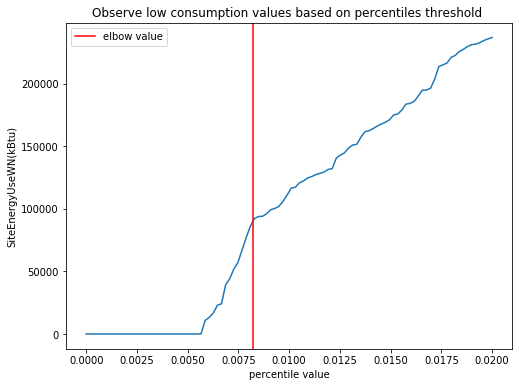

In [115]:
# Same method as emission low outlier (section 4.3.1.1) but for consumption here

c = np.linspace(0, 0.02, num = 100)
consolowq = data['SiteEnergyUseWN(kBtu)'].quantile(c)

plt.figure(figsize=[8,6])
sns.lineplot(x=c,y=consolowq)
elbow=0.0082
plt.title('Observe low consumption values based on percentiles threshold ')
plt.axvline(x=elbow,color='r',label='elbow value')
plt.legend()
plt.xlabel('percentile value')

In [116]:
outliers_lowconso =data.loc[(data['SiteEnergyUseWN(kBtu)']<data['SiteEnergyUseWN(kBtu)'].quantile(elbow))]

In [117]:
outliers_lowconso[column_tosee].sort_values(by='SiteEnergyUseWN(kBtu)', ascending=True)

,PrimaryPropertyType,YearBuilt,PropertyGFATotal,NumberofBuildings,NumberofFloors,SiteEnergyUseWN(kBtu),GHGEmissions(MetricTonsCO2e)
451,Small- and Mid-Sized Office,1904,78920,1.0,5.0,0.00000,13.80
6642,High-Rise Multifamily,2014,499477,1.0,41.0,0.00000,622.23
6617,University,1998,203030,1.0,6.0,0.00000,199.48
6615,University,1969,58779,1.0,4.0,0.00000,25.93
6614,University,1900,9320156,111.0,0.0,0.00000,11140.56
6506,K-12 School,1952,116101,1.0,1.0,0.00000,265.21
5234,K-12 School,1958,39971,1.0,1.0,0.00000,50.22
4293,Worship Facility,2000,31386,1.0,2.0,0.00000,27.14
4222,Worship Facility,1910,23931,1.0,2.0,0.00000,18.66
3970,K-12 School,1988,55353,1.0,3.0,0.00000,9.99


After checking, the only values we can drop here are the one equal to zero, we have no way to determine if other values are irrelevant 

In [124]:
# Remove 28 value at 0 + 1 NaN

data= data.loc[data['SiteEnergyUseWN(kBtu)']>0]
data.shape[0]

4743

#### Consumption high outlier

Text(0.5, 0, 'percentile value')

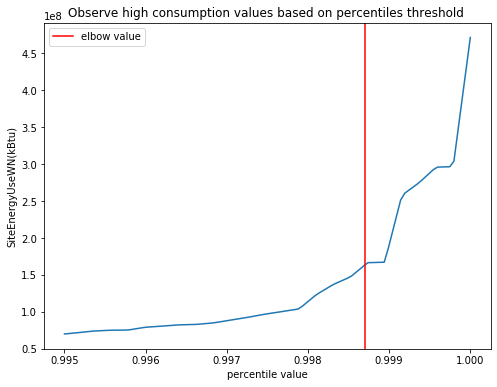

In [126]:
# Same method as emission low outlier (section 4.3.1.1) but for consumption here

d = np.linspace(0.995, 1, num = 100)
consohighq = data['SiteEnergyUseWN(kBtu)'].quantile(d)
plt.figure(figsize=[8,6])
elbow=0.9987
sns.lineplot(x=d,y=consohighq)
plt.title('Observe high consumption values based on percentiles threshold ')
plt.axvline(x=elbow,color='r',label='elbow value')
plt.legend()
plt.xlabel('percentile value')

In [127]:
outliers_highconsumption =data.loc[(data['SiteEnergyUseWN(kBtu)']>data['SiteEnergyUseWN(kBtu)'].quantile(elbow))]

In [128]:
outliers_highconsumption[column_tosee].sort_values(by='SiteEnergyUseWN(kBtu)', ascending=True)

,PrimaryPropertyType,YearBuilt,PropertyGFATotal,NumberofBuildings,NumberofFloors,SiteEnergyUseWN(kBtu),GHGEmissions(MetricTonsCO2e)
3272,Other,2002,808520,7.0,4.0,166523440.0,4829.86
6604,Hospital,1920,374466,1.0,8.0,167207104.0,6330.91
3464,Hospital,1953,879000,6.0,10.0,257764208.0,8145.52
3898,Other,1981,429405,1.0,33.0,274725984.0,1921.82
3958,Hospital,1994,1765970,7.0,14.0,295929888.0,12307.16
3510,Hospital,2000,1158691,9.0,8.0,296671744.0,10734.57
3375,Mixed Use Property,1992,494835,1.0,3.0,471613856.0,16870.98


Here we have the same values as in emission section, still no way to determine if irrelevant values, we will keep it

### Target feature to logarithm

Let's look at our targets distribution and skewness to see if there is a better scale for them to be handled properly 

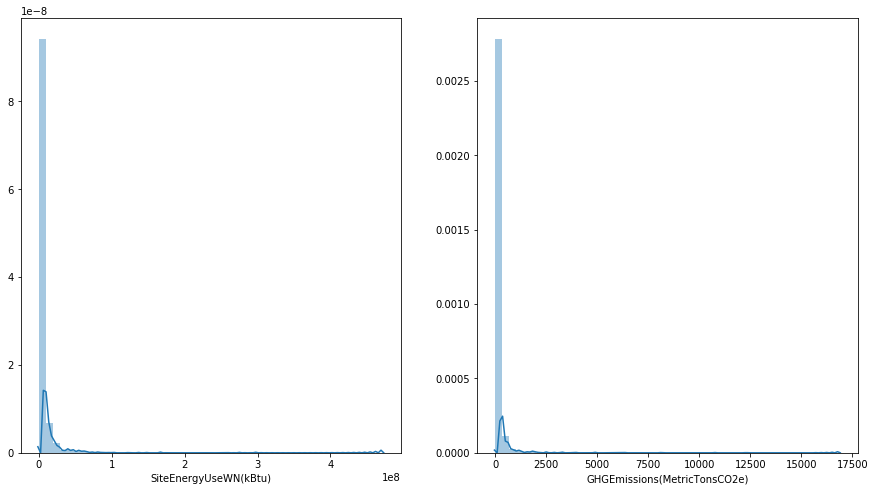

In [129]:
fig, axs = plt.subplots(1,2,figsize=(15,8))
 
sns.distplot(data['SiteEnergyUseWN(kBtu)'],ax=axs[0])
sns.distplot(data['GHGEmissions(MetricTonsCO2e)'],ax=axs[1])


plt.show()

In [130]:
print('skewness for SiteEnergyUseWN(kBtu):',stats.skew(data['SiteEnergyUseWN(kBtu)'].dropna()))

print('skewness for GHGEmissions(MetricTonsCO2e):',stats.skew(data['GHGEmissions(MetricTonsCO2e)'].dropna()))

skewness for SiteEnergyUseWN(kBtu): 15.077735359310045
skewness for GHGEmissions(MetricTonsCO2e): 20.959079985948026


___
The skewness of our two target is extremely high, a good way to re-scale our target would be to use ln(x+1) function. This way our targets will be closer to normal distribution which is easier to manipulate with our future prediction models

In [131]:
data['SiteEnergyUseWN(kBtu)']=np.log1p(data['SiteEnergyUseWN(kBtu)'])
data['GHGEmissions(MetricTonsCO2e)']=np.log1p(data['GHGEmissions(MetricTonsCO2e)'])

C:\Users\quent\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\quent\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


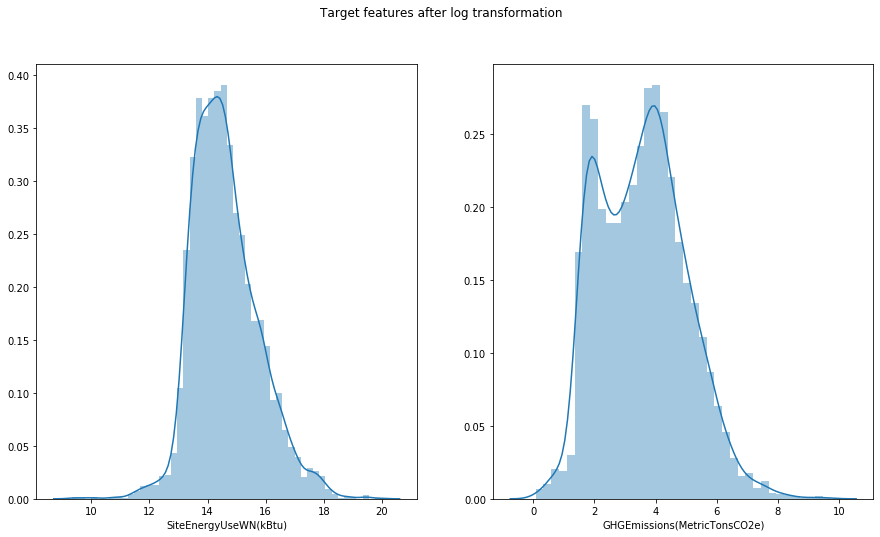

In [136]:
fig, axs = plt.subplots(1,2,figsize=(15,8))
plt.suptitle('Target features after log transformation')
sns.distplot(data['SiteEnergyUseWN(kBtu)'],ax=axs[0])
sns.distplot(data['GHGEmissions(MetricTonsCO2e)'],ax=axs[1])


plt.show()

In [166]:
data.to_csv (r'C:\Users\quent\Desktop\Formation_OCR\Projets\Projet_4\data_merged3.csv', index = False, header=True)

# Train - Feature selection/ Cleaning 

In [35]:
data= pd.read_csv("data_merged3.csv")

## Split Train-test

Now that our data is cleaned target-wise we can do a train-test split: 
    
This way we will have a train dataset to train our models and a test dataset to be able to check the performance of our model with unknown data

The goal of the next sections is to do a cleaning/feature engineering on train features, and create a general pre-processing pipeline for every other data we want to predict based on train values 

In [4]:
train,test = train_test_split(data,test_size=0.25)

## Overview/ Drop obvious useless features

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3557 entries, 2769 to 2366
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3557 non-null   int64  
 1   DataYear                         3557 non-null   int64  
 2   BuildingType                     3557 non-null   object 
 3   PrimaryPropertyType              3557 non-null   object 
 4   PropertyName                     3557 non-null   object 
 5   TaxParcelIdentificationNumber    3555 non-null   object 
 6   CouncilDistrictCode              3557 non-null   int64  
 7   Neighborhood                     3557 non-null   object 
 8   YearBuilt                        3557 non-null   int64  
 9   NumberofBuildings                3557 non-null   float64
 10  NumberofFloors                   3552 non-null   float64
 11  PropertyGFATotal                 3557 non-null   int64  
 12  PropertyGFAParkin

In [170]:
train.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
YearsENERGYSTARCertified            object
ENERGYSTARScore                    float64
SiteEnergyU


Potential useful features : 

- YearBuilt
- NumberOfFloors
- NumberOfBuildings
- Property GFA Total
- ListOfAllPropertyUseTypes ( or potentially Largest + Second ? )
- Location ? Lat-Long ? Neighborhood ? 

In [171]:
# the following list contains the first obvious useless features we need to drop after checking data online description

listtodrop = ['PropertyName',
             'TaxParcelIdentificationNumber',
             'YearsENERGYSTARCertified',
             'DefaultData',
             'Comments',
             'ComplianceStatus',
             'Outlier',
             'ZipCode',
             'Address',
             'City',
             'State']
               

In [172]:
# train=train.reindex(columns=listoffeatures)
train.drop(columns=listtodrop,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3557 entries, 328 to 3015
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3557 non-null   int64  
 1   DataYear                         3557 non-null   int64  
 2   BuildingType                     3557 non-null   object 
 3   PrimaryPropertyType              3557 non-null   object 
 4   CouncilDistrictCode              3557 non-null   int64  
 5   Neighborhood                     3557 non-null   object 
 6   YearBuilt                        3557 non-null   int64  
 7   NumberofBuildings                3557 non-null   float64
 8   NumberofFloors                   3551 non-null   float64
 9   PropertyGFATotal                 3557 non-null   int64  
 10  PropertyGFAParking               3557 non-null   int64  
 11  PropertyGFABuilding(s)           3557 non-null   int64  
 12  ListOfAllPropertyU

C:\Users\quent\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Train feature Cleaning 

### Observation of each remaining Feature

Create a loop to observe potential issues on each feature

In [173]:
for i in range(train.shape[1]):
    print('---------------------------\n{}\n---------------------------'.format(train.columns[i]))
    print(train[train.columns[i]].describe(),'\n')
    
    #displays list of unique values for each feature containing less than 25 different possible values
    if train[train.columns[i]].nunique()<25:
        print('Valeurs observées:\n',train[train.columns[i]].unique(),'\n')
        
    print('Nb de NaNs:',train[train.columns[i]].isna().sum(),'\n\n')
    
    

---------------------------
OSEBuildingID
---------------------------
count     3557.000000
mean     21016.736013
std      12051.615738
min          1.000000
25%      19932.000000
50%      23022.000000
75%      25822.000000
max      50226.000000
Name: OSEBuildingID, dtype: float64 

Nb de NaNs: 0 


---------------------------
DataYear
---------------------------
count    3557.000000
mean     2015.709868
std         0.453887
min      2015.000000
25%      2015.000000
50%      2016.000000
75%      2016.000000
max      2016.000000
Name: DataYear, dtype: float64 

Valeurs observées:
 [2015 2016] 

Nb de NaNs: 0 


---------------------------
BuildingType
---------------------------
count               3557
unique                 8
top       NonResidential
freq                1634
Name: BuildingType, dtype: object 

Valeurs observées:
 ['Multifamily MR (5-9)' 'NonResidential' 'Multifamily LR (1-4)'
 'Nonresidential COS' 'Multifamily HR (10+)' 'SPS-District K-12' 'Campus'
 'Nonresidential WA

Here, we can see the following problems: 

- NumberOfBuilding = 0 (min should be 1)
- FloorOfFloors = 0 (min should be 1)
- NumberOfBuilding & FloorOfFloors have some NaN values



In [174]:
#Checking if NbOfFloors= 0 is irrelevent (or if we do not count the ground floor)
train.loc[train['NumberofFloors']==0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),GHGEmissions(MetricTonsCO2e),Latitude,Longitude
4505,40028,2016,NonResidential,Warehouse,4,NORTHEAST,1940,1.0,0.0,384772,0,384772,"Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,349953.0,Office,63872.0,NaN,NaN,69.0,16.596784,5.973046,47.684540,-122.262350
221,657,2015,NonResidential,Mixed Use Property,7,DOWNTOWN,2006,1.0,0.0,516407,0,516407,"Financial Office, Hotel, Multifamily Housing, ...",Parking,385196.0,Multifamily Housing,340236.0,Hotel,67627.0,19.0,17.753685,7.109626,47.617939,-122.337387
1883,657,2016,NonResidential,Mixed Use Property,7,DOWNTOWN,2006,0.0,0.0,516407,0,516407,"Financial Office, Hotel, Multifamily Housing, ...",Parking,385196.0,Multifamily Housing,340236.0,Hotel,67627.0,31.0,17.523074,6.600850,47.617830,-122.337290
220,656,2015,NonResidential,Medical Office,3,EAST,2004,1.0,0.0,225982,0,225982,Medical Office,Medical Office,200184.0,NaN,NaN,NaN,NaN,61.0,16.744881,6.405972,47.609680,-122.323105
4646,49966,2016,NonResidential,Other,2,SOUTHEAST,2009,1.0,0.0,40265,0,40265,Pre-school/Daycare,Pre-school/Daycare,40265.0,NaN,NaN,NaN,NaN,NaN,14.631352,3.958716,47.562600,-122.293960
1566,267,2016,NonResidential,Hotel,7,DOWNTOWN,1999,1.0,0.0,934292,0,934292,"Hotel, Other, Parking, Restaurant, Retail Store",Hotel,495536.0,Parking,438756.0,Restaurant,49700.0,NaN,18.012755,7.402122,47.612750,-122.333300
4648,49979,2016,NonResidential,Residence Hall,4,NORTHEAST,1953,1.0,0.0,166991,0,166991,Residence Hall/Dormitory,Residence Hall/Dormitory,166991.0,NaN,NaN,NaN,NaN,19.0,16.624430,6.082675,47.655770,-122.315300
3372,24086,2016,Campus,Other,2,GREATER DUWAMISH,1991,10.0,0.0,230971,0,230971,"Other, Parking",Other,230970.0,Parking,0.0,NaN,NaN,NaN,16.916991,6.006476,47.590420,-122.324980
4542,49705,2016,Nonresidential COS,Other,4,NORTHEAST,1929,8.0,0.0,502030,0,502030,Other - Recreation,Other - Recreation,564258.0,NaN,NaN,NaN,NaN,NaN,16.844337,6.310118,47.682120,-122.263300
1957,758,2016,NonResidential,Other,7,DOWNTOWN,1999,1.0,0.0,947987,0,947987,"Office, Other - Entertainment/Public Assembly,...",Other - Mall,561684.0,Other - Entertainment/Public Assembly,100000.0,Restaurant,80000.0,NaN,17.651587,5.784594,47.612890,-122.335310


We have a very small amount of building with "0" floors, we can state that this is irrelevant and pass their values to 1 

### Modify features with obvious issues 

In [175]:
# Changing NumberofBuilding and NumberofFloors 0 values to 1 

train.loc[train['NumberofBuildings']==0,'NumberofBuildings']=1
train.loc[train['NumberofFloors']==0,'NumberofFloors']=1

colwithnan = ['NumberofBuildings','NumberofFloors']

# Drop the NaN values for NumberofBuilding and NumberofFloors
for i in range(len(colwithnan)):
    train=train.loc[train[colwithnan[i]].notna()]
    print('colwithnan[i]\n',train[colwithnan[i]].describe(),'\n')
    print('Nb de NaNs:',train[colwithnan[i]].isna().sum(),'\n\n')


colwithnan[i]
 count    3557.000000
mean        1.073658
std         0.639157
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        16.000000
Name: NumberofBuildings, dtype: float64 

Nb de NaNs: 0 


colwithnan[i]
 count    3551.000000
mean        4.509434
std         5.084731
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        76.000000
Name: NumberofFloors, dtype: float64 

Nb de NaNs: 0 




C:\Users\quent\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [176]:
train['BuildingType'].value_counts()

NonResidential          1631
Multifamily LR (1-4)    1023
Multifamily MR (5-9)     574
Multifamily HR (10+)     107
SPS-District K-12        104
Nonresidential COS        91
Campus                    20
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [7]:
# Changing NoNResidential COS and NOnresidentialWA to NonResidential 
data['BuildingType']=data['BuildingType']
train.loc[(train['BuildingType']=='Nonresidential WA')|(train['BuildingType']=='Nonresidential COS'),'BuildingType']='NonResidential'

C:\Users\quent\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [178]:
train['BuildingType'].value_counts()

NonResidential          1723
Multifamily LR (1-4)    1023
Multifamily MR (5-9)     574
Multifamily HR (10+)     107
SPS-District K-12        104
Campus                    20
Name: BuildingType, dtype: int64

## Redundant features

In [179]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3551 entries, 328 to 3015
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3551 non-null   int64  
 1   DataYear                         3551 non-null   int64  
 2   BuildingType                     3551 non-null   object 
 3   PrimaryPropertyType              3551 non-null   object 
 4   CouncilDistrictCode              3551 non-null   int64  
 5   Neighborhood                     3551 non-null   object 
 6   YearBuilt                        3551 non-null   int64  
 7   NumberofBuildings                3551 non-null   float64
 8   NumberofFloors                   3551 non-null   float64
 9   PropertyGFATotal                 3551 non-null   int64  
 10  PropertyGFAParking               3551 non-null   int64  
 11  PropertyGFABuilding(s)           3551 non-null   int64  
 12  ListOfAllPropertyU

* After closer study, neighborhood looks a bit messy (2 differents split notation are used) so we will drop it and keep 'CouncilDistrictCode' which uses a clear split 
* We might want to drop 'Property GFA Total' which is the sum of Building and parking GFA (we need to check whether this sum looks correct)

=> Let's look correlation between feature to try to spot potential other redundant feature 


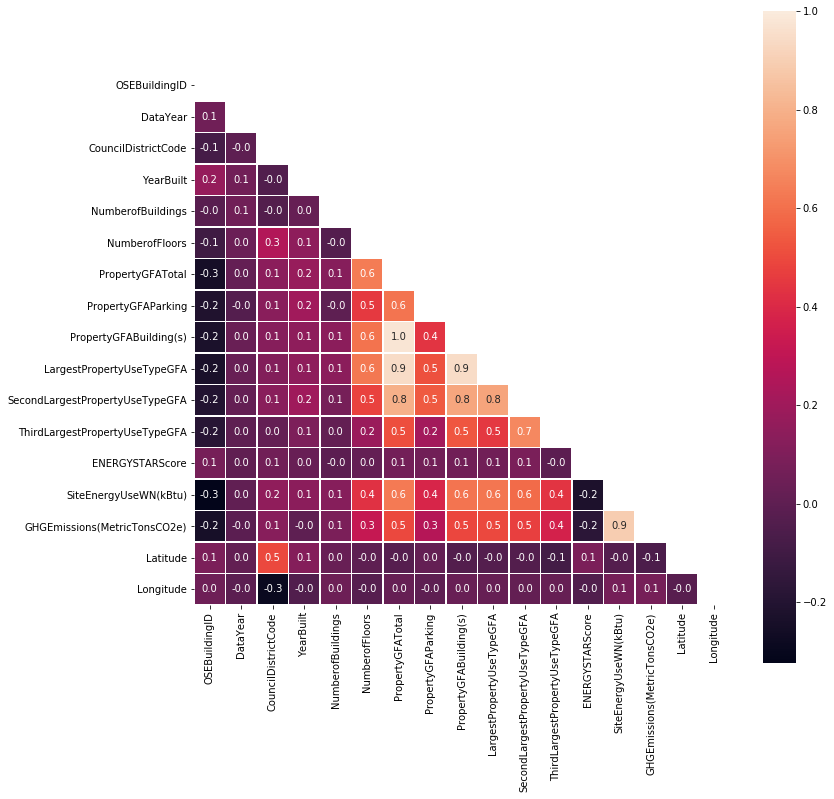

In [180]:
# Here is a mask to prevent the top right part of the following chart from appearing 
# As it is the symmetry of the bottom-left part we do not need to display it 
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Display pearson coef between to feature (1 means very high correlation, 0 no correlation)
plt.figure(figsize=(12, 12))
plt.xticks(rotation = 45)
sns.heatmap(corr, annot = True, mask = mask, fmt='.1f', linewidths=.5, square=True)

The main output of this chart is that all GFA features are really correlated, we need to study those feature closely 

### Study GFA Features

Two goals here : 
 * Check if PropertyGFATotal = PropertyGFABuilding+PropertyGFAParking
 * Check if PropertyGFATotal ~= LargestPropertyUseTypeGFA + SecondLargestPropertyUseTypeGFA + ThirdLargestPropertyUseTypeGFA

In [202]:
# Here we create a table where we only keep GFA featues for study
study_GFA = train.loc[:,['PropertyGFATotal','LargestPropertyUseTypeGFA','PropertyGFABuilding(s)',
                'PropertyGFAParking','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']]

In [203]:
study_GFA

,PropertyGFATotal,LargestPropertyUseTypeGFA,PropertyGFABuilding(s),PropertyGFAParking,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
328,112676,77887.0,77887,34789,34789.0,NaN
1826,104786,104786.0,104786,0,NaN,NaN
3442,26970,26970.0,26970,0,2800.0,400.0
3602,27320,27320.0,27320,0,0.0,NaN
1068,29498,19749.0,29498,0,9148.0,NaN
...,...,...,...,...,...,...
2096,106066,118802.0,106066,0,6245.0,NaN
3375,31365,31365.0,31365,0,NaN,NaN
2439,22612,22612.0,22612,0,NaN,NaN
3723,21871,10608.0,21871,0,6729.0,2048.0


In [204]:
# Fill all the NaN values with 0 (to be able to perform sum on each row)
study_GFA=study_GFA.fillna(0)

In [205]:
# Create two new columns: 
# one that sums GFABuilding and GFAParking
# the other sums Largest, secondlargest and third usetypeGFA

study_GFA['SumBuildingParking']=study_GFA['PropertyGFABuilding(s)']+study_GFA['PropertyGFAParking']
study_GFA['SumPropertyUseGFA']=study_GFA['LargestPropertyUseTypeGFA']+study_GFA['SecondLargestPropertyUseTypeGFA']+study_GFA['ThirdLargestPropertyUseTypeGFA']

In [206]:
# We create 2 more columns : 
# The first is the absolute difference between the GFATotal and the BuildingParkingGFA Sum (in percent)
# The second is the absolute difference between the GFATotal and the PropertyUseTypeGFA Sum (in percent)

study_GFA['diffTotal_BuilPark']= abs((study_GFA['PropertyGFATotal']-study_GFA['SumBuildingParking'])/study_GFA['PropertyGFATotal']*100)
study_GFA['diffTotal_PropTYPE']= abs((study_GFA['PropertyGFATotal']-study_GFA['SumPropertyUseGFA'])/study_GFA['PropertyGFATotal']*100)

In [207]:
study_GFA.describe()

,PropertyGFATotal,LargestPropertyUseTypeGFA,PropertyGFABuilding(s),PropertyGFAParking,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SumBuildingParking,SumPropertyUseGFA,diffTotal_BuilPark,diffTotal_PropTYPE
count,3.551000e+03,3.551000e+03,3.551000e+03,3551.000000,3551.00000,3551.000000,3.551000e+03,3.551000e+03,3551.0,3551.000000
mean,8.882526e+04,7.197682e+04,8.021096e+04,8614.306393,13098.68392,2007.302562,8.882526e+04,8.708281e+04,0.0,11.556747
std,1.429370e+05,1.163703e+05,1.252636e+05,33142.730911,37973.65508,12778.986774,1.429370e+05,1.503827e+05,0.0,26.206412
min,1.128500e+04,0.000000e+00,-4.331000e+04,-3.000000,0.00000,0.000000,1.128500e+04,0.000000e+00,0.0,0.000000
25%,2.818050e+04,2.452000e+04,2.724650e+04,0.000000,0.00000,0.000000,2.818050e+04,2.715800e+04,0.0,0.000000
50%,4.364500e+04,3.800000e+04,4.213100e+04,0.000000,0.00000,0.000000,4.364500e+04,4.284400e+04,0.0,0.231082
75%,8.800200e+04,7.110850e+04,8.036550e+04,0.000000,9649.00000,0.000000,8.800200e+04,8.302550e+04,0.0,13.122126
max,2.200000e+06,1.719643e+06,2.200000e+06,512608.000000,639931.00000,459748.000000,2.200000e+06,2.080885e+06,0.0,542.684902


___ 
With this description table we can make the following statement : 
- PropertyGFATotal is indeed equal to Building + Parking (difference is equal to 0%)
- PropertyGFATtoal is not exactly equal to Largest+Second+Third Property use type (for example the max difference is 542%)

=> we need to have an even closer look at the second part 

In [214]:

study_GFA.loc[(study_GFA['LargestPropertyUseTypeGFA']==0)]

,PropertyGFATotal,LargestPropertyUseTypeGFA,PropertyGFABuilding(s),PropertyGFAParking,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SumBuildingParking,SumPropertyUseGFA,diffTotal_BuilPark,diffTotal_PropTYPE
266,71718,0.0,71718,0,0.0,0.0,71718,0.0,0.0,100.0
2866,45715,0.0,45715,0,0.0,0.0,45715,0.0,0.0,100.0
1390,374466,0.0,374466,0,0.0,0.0,374466,0.0,0.0,100.0
1358,59205,0.0,59205,0,0.0,0.0,59205,0.0,0.0,100.0
994,30630,0.0,30630,0,0.0,0.0,30630,0.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...
853,24221,0.0,24221,0,0.0,0.0,24221,0.0,0.0,100.0
451,34542,0.0,25514,9028,0.0,0.0,34542,0.0,0.0,100.0
2532,61721,0.0,61721,0,0.0,0.0,61721,0.0,0.0,100.0
4261,42448,0.0,42448,0,0.0,0.0,42448,0.0,0.0,100.0


Here we will look at the building with more that 99% difference between the total and the propertyUseTypeGFA this contains :
   * all building with not value in PropertyUseType GFA (then difference is 100%)
   * all building with high difference between the two features, which need to be observed 

In [213]:

study_GFA.loc[(study_GFA['diffTotal_PropTYPE']>99)&(study_GFA['LargestPropertyUseTypeGFA']>0)]

,PropertyGFATotal,LargestPropertyUseTypeGFA,PropertyGFABuilding(s),PropertyGFAParking,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SumBuildingParking,SumPropertyUseGFA,diffTotal_BuilPark,diffTotal_PropTYPE
3858,54863,109726.0,54863,0,0.0,0.0,54863,109726.0,0.0,100.000000
269,303255,321828.0,283435,19820,298043.0,5636.0,303255,625507.0,0.0,106.264365
4499,333698,432903.0,333698,0,333698.0,0.0,333698,766601.0,0.0,129.728976
1311,22890,43452.0,22890,0,2890.0,0.0,22890,46342.0,0.0,102.455221
2864,20971,23483.0,20971,0,10360.0,8509.0,20971,42352.0,0.0,101.955081
4457,46725,102522.0,46725,0,0.0,0.0,46725,102522.0,0.0,119.415730
2748,61887,61887.0,61887,0,61812.0,0.0,61887,123699.0,0.0,99.878811
1336,333698,432903.0,333698,0,333698.0,0.0,333698,766601.0,0.0,129.728976
2339,21500,96154.0,21500,0,0.0,0.0,21500,96154.0,0.0,347.227907
3625,16300,65164.0,16300,0,0.0,0.0,16300,65164.0,0.0,299.779141


___
We can see here that either the value of LargestPropertyUseTYpeGFA is equal to 0 or higher than GFATotal

=> We can go back on the train dataframe and drop those buildings

In [222]:
#Impute missing GFA values to 0 
propertyuseGFA = ['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']

for rank in propertyuseGFA:
    train[rank]=train[rank].fillna(0)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),GHGEmissions(MetricTonsCO2e),Latitude,Longitude
328,19758,2015,Multifamily MR (5-9),Mid-Rise Multifamily,7,DOWNTOWN,1990,1.0,6.0,112676,34789,77887,"Multifamily Housing, Parking",Multifamily Housing,77887.0,Parking,34789.0,NaN,0.0,89.0,14.965253,3.898127,47.612678,-122.348374
1826,590,2016,NonResidential,Warehouse,2,GREATER DUWAMISH,1969,1.0,2.0,104786,0,104786,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,104786.0,NaN,0.0,NaN,0.0,93.0,13.958099,3.213260,47.560890,-122.334740
3442,24292,2016,Multifamily LR (1-4),Low-Rise Multifamily,1,SOUTHWEST,1980,1.0,4.0,26970,0,26970,"Multifamily Housing, Non-Refrigerated Warehous...",Multifamily Housing,26970.0,Parking,2800.0,Non-Refrigerated Warehouse,400.0,NaN,13.481616,1.742219,47.533230,-122.376930
3602,24858,2016,Multifamily LR (1-4),Low-Rise Multifamily,2,SOUTHEAST,1969,1.0,3.0,27320,0,27320,"Multifamily Housing, Parking",Multifamily Housing,27320.0,Parking,0.0,NaN,0.0,63.0,13.774366,1.983756,47.547200,-122.276330
1068,25563,2015,NonResidential,Non-Refrigerated Warehouse,7,LAKE UNION,1968,1.0,2.0,29498,0,29498,"Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,19749.0,Office,9148.0,NaN,0.0,NaN,15.055683,3.865141,47.642577,-122.342509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,19673,2016,Multifamily HR (10+),High-Rise Multifamily,7,DOWNTOWN,2003,1.0,13.0,106066,0,106066,"Multifamily Housing, Office",Multifamily Housing,118802.0,Office,6245.0,NaN,0.0,61.0,15.450301,4.986001,47.615020,-122.352630
3375,24099,2016,NonResidential,Other,2,GREATER DUWAMISH,1972,1.0,1.0,31365,0,31365,Other,Other,31365.0,NaN,0.0,NaN,0.0,NaN,13.428127,1.806648,47.579360,-122.323220
2439,20659,2016,NonResidential,Worship Facility,7,MAGNOLIA / QUEEN ANNE,1947,1.0,2.0,22612,0,22612,Worship Facility,Worship Facility,22612.0,NaN,0.0,NaN,0.0,87.0,13.658636,3.484312,47.639270,-122.403200
3723,25329,2016,Multifamily LR (1-4),Low-Rise Multifamily,4,LAKE UNION,1990,1.0,3.0,21871,0,21871,"Multifamily Housing, Other, Parking, Retail Store",Multifamily Housing,10608.0,Parking,6729.0,Other,2048.0,NaN,13.610696,1.859418,47.664120,-122.340210


In [223]:
#Recreate the "absolute-difference-in-percent" feature between GFATotal and PropertyUseTypeGFA 
train['diff']= abs((train['PropertyGFATotal']-(study_GFA['LargestPropertyUseTypeGFA']+
                                               study_GFA['SecondLargestPropertyUseTypeGFA']+
                                               study_GFA['ThirdLargestPropertyUseTypeGFA']))
                                               /train['PropertyGFATotal']*100)
train

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),GHGEmissions(MetricTonsCO2e),Latitude,Longitude,diff,diffTotal_PropTYPE
328,19758,2015,Multifamily MR (5-9),Mid-Rise Multifamily,7,DOWNTOWN,1990,1.0,6.0,112676,34789,77887,"Multifamily Housing, Parking",Multifamily Housing,77887.0,Parking,34789.0,NaN,0.0,89.0,14.965253,3.898127,47.612678,-122.348374,0.000000,0.000000
1826,590,2016,NonResidential,Warehouse,2,GREATER DUWAMISH,1969,1.0,2.0,104786,0,104786,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,104786.0,NaN,0.0,NaN,0.0,93.0,13.958099,3.213260,47.560890,-122.334740,0.000000,0.000000
3442,24292,2016,Multifamily LR (1-4),Low-Rise Multifamily,1,SOUTHWEST,1980,1.0,4.0,26970,0,26970,"Multifamily Housing, Non-Refrigerated Warehous...",Multifamily Housing,26970.0,Parking,2800.0,Non-Refrigerated Warehouse,400.0,NaN,13.481616,1.742219,47.533230,-122.376930,11.865035,11.865035
3602,24858,2016,Multifamily LR (1-4),Low-Rise Multifamily,2,SOUTHEAST,1969,1.0,3.0,27320,0,27320,"Multifamily Housing, Parking",Multifamily Housing,27320.0,Parking,0.0,NaN,0.0,63.0,13.774366,1.983756,47.547200,-122.276330,0.000000,0.000000
1068,25563,2015,NonResidential,Non-Refrigerated Warehouse,7,LAKE UNION,1968,1.0,2.0,29498,0,29498,"Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,19749.0,Office,9148.0,NaN,0.0,NaN,15.055683,3.865141,47.642577,-122.342509,2.037426,2.037426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,19673,2016,Multifamily HR (10+),High-Rise Multifamily,7,DOWNTOWN,2003,1.0,13.0,106066,0,106066,"Multifamily Housing, Office",Multifamily Housing,118802.0,Office,6245.0,NaN,0.0,61.0,15.450301,4.986001,47.615020,-122.352630,17.895461,17.895461
3375,24099,2016,NonResidential,Other,2,GREATER DUWAMISH,1972,1.0,1.0,31365,0,31365,Other,Other,31365.0,NaN,0.0,NaN,0.0,NaN,13.428127,1.806648,47.579360,-122.323220,0.000000,0.000000
2439,20659,2016,NonResidential,Worship Facility,7,MAGNOLIA / QUEEN ANNE,1947,1.0,2.0,22612,0,22612,Worship Facility,Worship Facility,22612.0,NaN,0.0,NaN,0.0,87.0,13.658636,3.484312,47.639270,-122.403200,0.000000,0.000000
3723,25329,2016,Multifamily LR (1-4),Low-Rise Multifamily,4,LAKE UNION,1990,1.0,3.0,21871,0,21871,"Multifamily Housing, Other, Parking, Retail Store",Multifamily Housing,10608.0,Parking,6729.0,Other,2048.0,NaN,13.610696,1.859418,47.664120,-122.340210,11.366650,11.366650


In [231]:
#Drop building where diff is higher than 99% as mentionned previously
train=train.loc[~(train['diff']>99)]

In [232]:
# As mentionned earlier we can drop Neighborhood and PropertyGFATotal feature 
# (and also the 'diff' columns which was only use to clean data )
list_to_drop = ['Neighborhood','PropertyGFATotal','diff']

train.drop(columns=list_to_drop,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3452 entries, 328 to 3015
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3452 non-null   int64  
 1   DataYear                         3452 non-null   int64  
 2   BuildingType                     3452 non-null   object 
 3   PrimaryPropertyType              3452 non-null   object 
 4   CouncilDistrictCode              3452 non-null   int64  
 5   YearBuilt                        3452 non-null   int64  
 6   NumberofBuildings                3452 non-null   float64
 7   NumberofFloors                   3452 non-null   float64
 8   PropertyGFAParking               3452 non-null   int64  
 9   PropertyGFABuilding(s)           3452 non-null   int64  
 10  ListOfAllPropertyUseTypes        3452 non-null   object 
 11  LargestPropertyUseType           3452 non-null   object 
 12  LargestPropertyUse

C:\Users\quent\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Train Feature Engineering 

## Create new features 

We can create two feature: 
* BuildingAge = DataYear - Yearbuilt 
* Volume = PropertyGFABuilding * average_floor_height (value found on internet: 8 feet)

In [233]:
train['BuildingAge']=train['DataYear']-train['YearBuilt']
train['BuildingAge'].describe()

C:\Users\quent\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    3452.000000
mean       48.889629
std        33.536423
min         0.000000
25%        20.000000
50%        45.000000
75%        74.000000
max       116.000000
Name: BuildingAge, dtype: float64

In [234]:
train.drop(columns=['DataYear','YearBuilt'],inplace=True)

In [273]:
height_average = 8
train['Volume']=train['PropertyGFABuilding(s)']*height_average


In [282]:
train['Volume'].describe()

count    3.451000e+03
mean     5.990911e+05
std      9.408372e+05
min      7.245000e+04
25%      2.043638e+05
50%      3.144000e+05
75%      6.005962e+05
max      1.650000e+07
Name: Volume, dtype: float64

In [4]:
train['CouncilDistrictCode'] = train['CouncilDistrictCode'].astype('category')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3557 entries, 3290 to 1165
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   OSEBuildingID                    3557 non-null   int64   
 1   DataYear                         3557 non-null   int64   
 2   BuildingType                     3557 non-null   object  
 3   PrimaryPropertyType              3557 non-null   object  
 4   PropertyName                     3557 non-null   object  
 5   TaxParcelIdentificationNumber    3556 non-null   object  
 6   CouncilDistrictCode              3557 non-null   category
 7   Neighborhood                     3557 non-null   object  
 8   YearBuilt                        3557 non-null   int64   
 9   NumberofBuildings                3557 non-null   float64 
 10  NumberofFloors                   3554 non-null   float64 
 11  PropertyGFATotal                 3557 non-null   int64   
 12  Pro

C:\Users\quent\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## PropertyUseType Encoding 

### PropertyTypes main categories creation 

Here we need to encode the categorical features "propertyusetype". First we need to gather all the possible values for these features 

In [404]:
train['ListOfAllPropertyUseTypes']

65                                                  Other
5318                                Automobile Dealership
1110                   Non-Refrigerated Warehouse, Office
4825                                               Office
3994                                  Multifamily Housing
                              ...                        
4139                                  Multifamily Housing
2360                                Automobile Dealership
545                       Medical Office, Office, Parking
1734                                                  NaN
3461    Medical Office, Multifamily Housing, Office, R...
Name: ListOfAllPropertyUseTypes, Length: 4933, dtype: object

In [405]:
# Here we want to split each value in columns "listofallpropertyusetypes" 

#first, create a column for each value in this column
PropUse = train["ListOfAllPropertyUseTypes"].str.split(", ", n =0, expand = True) 
PropUse

,0,1,2,3,4,5,6,7,8,9,10,11,12
65,Other,None,None,None,None,None,None,None,None,None,None,None,None
5318,Automobile Dealership,None,None,None,None,None,None,None,None,None,None,None,None
1110,Non-Refrigerated Warehouse,Office,None,None,None,None,None,None,None,None,None,None,None
4825,Office,None,None,None,None,None,None,None,None,None,None,None,None
3994,Multifamily Housing,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,Multifamily Housing,None,None,None,None,None,None,None,None,None,None,None,None
2360,Automobile Dealership,None,None,None,None,None,None,None,None,None,None,None,None
545,Medical Office,Office,Parking,None,None,None,None,None,None,None,None,None,None
1734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
# Then create a loop which add to a list the unique values for each column

ListUseType = []
for i in range(PropUse.shape[1]):
    ListUseType+=PropUse.iloc[:,i].unique().tolist()

# Here we use a little trick, turn our list into a dictionnary and then back to a list 
#(which will remove all duplicates in the list)    
ListUseType=list(dict.fromkeys(ListUseType))
ListUseType.remove(np.nan)
ListUseType = list(filter(None, ListUseType)) 

ListUseType

['Other',
 'Automobile Dealership',
 'Non-Refrigerated Warehouse',
 'Office',
 'Multifamily Housing',
 'Hotel',
 'Senior Care Community',
 'Medical Office',
 'K-12 School',
 'Worship Facility',
 'Performing Arts',
 'Food Sales',
 'Hospital (General Medical & Surgical)',
 'Data Center',
 'Retail Store',
 'Other/Specialty Hospital',
 'College/University',
 'Bank Branch',
 'Laboratory',
 'Other - Education',
 'Other - Recreation',
 'Distribution Center',
 'Restaurant',
 'Parking',
 'Lifestyle Center',
 'Fast Food Restaurant',
 'Urgent Care/Clinic/Other Outpatient',
 'Pre-school/Daycare',
 'Wholesale Club/Supercenter',
 'Financial Office',
 'Self-Storage Facility',
 'Repair Services (Vehicle',
 'Supermarket/Grocery Store',
 'Fire Station',
 'Residence Hall/Dormitory',
 'Other - Services',
 'Adult Education',
 'Manufacturing/Industrial Plant',
 'Bar/Nightclub',
 'Fitness Center/Health Club/Gym',
 'Other - Mall',
 'Other - Public Services',
 'Refrigerated Warehouse',
 'Social/Meeting Hall',


In [407]:
# WE use the same method we used above, for the remaining "propertyUseType" features
ListUseType_bis = []
LargestType = ['PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']
for i in range(4): 
    ListUseType_bis += train[LargestType[i]].unique().tolist()
ListUseType_bis=list(dict.fromkeys(ListUseType_bis))
ListUseType_bis.remove(np.nan)
ListUseType_bis = list(filter(None, ListUseType_bis)) 
ListUseType_bis 

['Other',
 'Small- and Mid-Sized Office',
 'Low-Rise Multifamily',
 'Hotel',
 'Senior Care Community',
 'Mid-Rise Multifamily',
 'Large Office',
 'Medical Office',
 'K-12 School',
 'Worship Facility',
 'High-Rise Multifamily',
 'Restaurant',
 'Warehouse',
 'Hospital',
 'Retail Store',
 'Mixed Use Property',
 'University',
 'SPS-District K-12',
 'Distribution Center\n',
 'Restaurant\n',
 'Distribution Center',
 'Non-Refrigerated Warehouse',
 'College/University',
 'Supermarket / Grocery Store',
 'Self-Storage Facility\n',
 'Self-Storage Facility',
 'Supermarket/Grocery Store',
 'Residence Hall',
 'Office',
 'Refrigerated Warehouse',
 'Laboratory',
 'Residence Hall/Dormitory',
 'Automobile Dealership',
 'Multifamily Housing',
 'Performing Arts',
 'Hospital (General Medical & Surgical)',
 'Social/Meeting Hall',
 'Other/Specialty Hospital',
 'Other - Recreation',
 'Parking',
 'Lifestyle Center',
 'Other - Entertainment/Public Assembly',
 'Other - Restaurant/Bar',
 'Urgent Care/Clinic/Other

In [408]:
#Concatenate our two lists and remove duplicates so as to have a final list of possible values 
ListUseType=ListUseType + ListUseType_bis
ListUseType=list(dict.fromkeys(ListUseType))

ListUseType


['Other',
 'Automobile Dealership',
 'Non-Refrigerated Warehouse',
 'Office',
 'Multifamily Housing',
 'Hotel',
 'Senior Care Community',
 'Medical Office',
 'K-12 School',
 'Worship Facility',
 'Performing Arts',
 'Food Sales',
 'Hospital (General Medical & Surgical)',
 'Data Center',
 'Retail Store',
 'Other/Specialty Hospital',
 'College/University',
 'Bank Branch',
 'Laboratory',
 'Other - Education',
 'Other - Recreation',
 'Distribution Center',
 'Restaurant',
 'Parking',
 'Lifestyle Center',
 'Fast Food Restaurant',
 'Urgent Care/Clinic/Other Outpatient',
 'Pre-school/Daycare',
 'Wholesale Club/Supercenter',
 'Financial Office',
 'Self-Storage Facility',
 'Repair Services (Vehicle',
 'Supermarket/Grocery Store',
 'Fire Station',
 'Residence Hall/Dormitory',
 'Other - Services',
 'Adult Education',
 'Manufacturing/Industrial Plant',
 'Bar/Nightclub',
 'Fitness Center/Health Club/Gym',
 'Other - Mall',
 'Other - Public Services',
 'Refrigerated Warehouse',
 'Social/Meeting Hall',


___
We have now a list of around 90 values. We now want to decrease this amount with grouping them into macro-categories

In [409]:
train['PrimaryPropertyType'].value_counts()

Low-Rise Multifamily           1483
Mid-Rise Multifamily            814
Small- and Mid-Sized Office     448
Other                           368
Large Office                    242
Mixed Use Property              187
K-12 School                     184
High-Rise Multifamily           150
Retail Store                    145
Warehouse                       138
Non-Refrigerated Warehouse      135
Worship Facility                108
Hotel                           103
Senior Care Community            68
Medical Office                   61
Distribution Center\n            41
Distribution Center              40
Supermarket / Grocery Store      29
Supermarket/Grocery Store        29
Self-Storage Facility            21
Self-Storage Facility\n          20
Refrigerated Warehouse           19
University                       18
College/University               17
Residence Hall                   16
Residence Hall/Dormitory         11
Restaurant                       10
Restaurant\n                

In [239]:
# Here we create a dictionnary to be able to change each value to the corresponding macro-category 

typedict = {'Other - Entertainment/Public Assembly':'Entertainment',
             'Fitness Center/Health Club/Gym':'Entertainment',
             'Museum':'Entertainment',
             'Worship Facility':'Entertainment',
             'Movie Theater':'Entertainment',
             'Convention Center':'Entertainment',
             'Other - Recreation':'Entertainment',
             'Swimming Pool':'Entertainment',
             'Entertainment':'Entertainment',
            
             'Medical Office':'Hospital',
             'Hospital (General Medical & Surgical)':'Hospital',
             'Other/Specialty Hospital':'Hospital',
             'Urgent Care/Clinic/Other Outpatient':'Hospital',
             'Outpatient Rehabilitation/Physical Therapy':'Hospital',
             'Hospital':'Hospital',
            
             'Hotel':'Hotel',
             'Multifamily Housing':'Hotel',
             'Senior Care Community':'Hotel',
             'Residence Hall/Dormitory':'Hotel',
             'Residential Care Facility':'Hotel',
             'Other - Lodging/Residential':'Hotel',
             'Prison/Incarceration':'Hotel',
             'Single Family Home':'Hotel',
             'Mid-Rise Multifamily':'Hotel',
             'Low-Rise Multifamily':'Hotel',
             'High-Rise Multifamily':'Hotel',
             'Residence Hall':'Hotel',
            
             'Manufacturing/Industrial Plant':'Manufacturing',
             'Manufacturing':'Manufacturing',
            
             'Police Station':'Office',
             'Office':'Office',
             'Courthouse':'Office',
             'Financial Office':'Office',
             'Laboratory':'Office',
             'Bank Branch':'Office',
             'Other - Public Services':'Office',
             'Social/Meeting Hall':'Office',
             'Fire Station':'Office',
             'Other - Services':'Office',
             'Other - Technology/Science':'Office',
             'Small- and Mid-Sized Office':'Office',
             'Large Office':'Office',
             'SPS-District K-12':'Office',
            
             'Food Service':'Restaurant',
             'Restaurant':'Restaurant',
             'Fast Food Restaurant':'Restaurant',
             'Food Sales':'Restaurant',
             'Bar/Nightclub':'Restaurant',
             'Other - Restaurant/Bar':'Restaurant',
             'Restaurant\n':'Restaurant',
            
             'Automobile Dealership':'Retail',
             'Retail':'Retail',
             'Retail Store':'Retail',
             'Repair Services (Vehicle':'Retail',
             'Convenience Store without Gas Station':'Retail',
             'Supermarket/Grocery Store':'Retail',
             'Wholesale Club/Supercenter':'Retail',
             'Strip Mall':'Retail',
             'Library':'Retail',
             'Lifestyle Center':'Retail',
             'Other - Mall':'Retail',
             'Personal Services (Health/Beauty':'Retail',
             'Enclosed Mall':'Retail',
             'Shoe':'Retail',
             'Dry Cleaning':'Retail',
             'Locksmith':'Retail',
             'Supermarket / Grocery Store':'Retail',
             'Repair Services (Vehicle, Shoe, Locksmith, etc)':'Retail',
             'Personal Services (Health/Beauty, Dry Cleaning, etc)':'Retail',
            
             'K-12 School':'School',
             'College/University':'School',
             'Adult Education':'School',
             'Other - Education':'School',
             'Performing Arts':'School',
             'Pre-school/Daycare':'School',
             'Vocational School':'School',
             'Vocat':'School',
             'University':'School',
             'School':'School',
            
             'Data Center':'Special Storage',
             'Distribution Center':'Special Storage',
             'Refrigerated Warehouse':'Special Storage',
             'Energy/Power Station':'Special Storage',
             'Special Storage':'Special Storage',
             'Distribution Center\n':'Special Storage',
            
             'Self-Storage Facility':'Storage',
             'Storage':'Storage',
             'Non-Refrigerated Warehouse':'Storage',
             'Parking':'Storage',
             'Self-Storage Facility\n':'Storage',
             'Warehouse':'Storage'}


In [411]:
# We save this dictionnary with pickle so as to be able to re-use it afterwards 
with open('typedict.pickle', 'wb') as file:
    pickle.dump(typedict, file)

### PropertyUseType transform with categories

In [240]:
train.drop(columns='ListOfAllPropertyUseTypes',inplace=True)


C:\Users\quent\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [241]:
#lets transform all categories value into its corresponding macro-category 
LargestType = ['PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']

# Here for each concerned columns we map the value with its corresponding dict value 
#(if it doesn't exist in the dictionnary,we set the value as "other" )

for i in range(len(LargestType)):
    train[LargestType[i]]=train[LargestType[i]].map(typedict).fillna('Other')
    print(LargestType[i],':\n',train[LargestType[i]].value_counts(),'\n\n')


PrimaryPropertyType :
 Hotel              1744
Office              510
Other               418
Storage             247
School              172
Retail              144
Special Storage      80
Entertainment        79
Hospital             46
Restaurant           12
Name: PrimaryPropertyType, dtype: int64 


LargestPropertyUseType :
 Hotel              1786
Office              577
Storage             299
School              187
Retail              177
Entertainment       145
Other               119
Special Storage      84
Hospital             56
Restaurant           16
Manufacturing         6
Name: LargestPropertyUseType, dtype: int64 


SecondLargestPropertyUseType :
 Other              1808
Storage             986
Office              285
Retail              192
Restaurant           57
Entertainment        46
Hotel                24
School               21
Special Storage      20
Hospital             13
Name: SecondLargestPropertyUseType, dtype: int64 


ThirdLargestPropertyUseType :
 Oth

C:\Users\quent\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


###  One hot encoding

In [250]:
# Create OneHotEncoding-like feature using get_dummies function : 
# transform one categorical feature with n-categories into n-boolean features 
train = pd.get_dummies(train,columns=LargestType)
train=train.loc[:,~train.columns.str.contains('Other')]
train=train.loc[:,~train.columns.str.contains('Primary')]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3452 entries, 328 to 3015
Data columns (total 46 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   OSEBuildingID                                 3452 non-null   int64   
 1   BuildingType                                  3452 non-null   object  
 2   CouncilDistrictCode                           3452 non-null   category
 3   NumberofBuildings                             3452 non-null   float64 
 4   NumberofFloors                                3452 non-null   float64 
 5   PropertyGFAParking                            3452 non-null   int64   
 6   PropertyGFABuilding(s)                        3452 non-null   int64   
 7   LargestPropertyUseTypeGFA                     3452 non-null   float64 
 8   SecondLargestPropertyUseTypeGFA               3452 non-null   float64 
 9   ThirdLargestPropertyUseTypeGFA                3452

## Target encoding - BuildingType Feature

In [247]:
train['BuildingType'].unique().tolist()

['Multifamily MR (5-9)',
 'NonResidential',
 'Multifamily LR (1-4)',
 'Multifamily HR (10+)',
 'SPS-District K-12',
 'Campus']

**Homemade target encoding function**

parameters:
* Data : DataFrame to use
* col_name : column to encode 
* target_name : target columns 
    
This function will check the percentage of occurence of each category of the feature you want to encode: 
* if the category represents more than 10% of the data => encode with the median of the target for this category
* if the category represents between 5 and 10% of the data => encode with 50% of the median of the target for this category and 50% of the global median
* if the category represents less than 5% of the data => encode with 20% of the median of the target for this category and 80% of the global median

In [8]:


def my_target_encoder(data,col_name,target_name):
    
    categories=data[col_name].unique().tolist()
    data_return = data
    
    for i in range(len(categories)):
        ratio = data_return.loc[data_return[col_name]==categories[i]].shape[0]/data_return.shape[0]
        if ratio > 0.1 : 
            data_return.loc[data_return[col_name]==categories[i],col_name]=data_return.loc[data_return[col_name]==categories[i],target_name].median()
        elif ratio > 0.05 : 
            data_return.loc[data_return[col_name]==categories[i],col_name]=data_return.loc[data_return[col_name]==categories[i],target_name].median()*0.5+data_return[target_name].median()*0.5
        else:
            data_return.loc[data_return[col_name]==categories[i],col_name]=data_return.loc[data_return[col_name]==categories[i],target_name].median()*0.2+data_return[target_name].median()*0.8

    
    return data_return
        

In [21]:
# Create two columns in train dataset:
# BuildingType target encoded with Emission
# BuildingType target encoded with Consumption

encode_emi = train.copy()
encode_emi = my_target_encoder(encode_emi,'BuildingType','SiteEnergyUseWN(kBtu)')
encode_conso = train.copy()
encode_conso = my_target_encoder(encode_conso,'BuildingType','GHGEmissions(MetricTonsCO2e)')

train['target_conso']=encode_conso['BuildingType']
train['target_emi']=encode_emi['BuildingType']
train

        

C:\Users\quent\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\quent\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,ComplianceStatus,Outlier,ZipCode,Latitude,Longitude,Address,City,State,target_conso,target_emi
3290,23782,2016,Multifamily LR (1-4),Low-Rise Multifamily,Highland Terrace Condominium,3299720000,5,NORTH,1979,1.0,...,Compliant,NaN,98115.0,47.692480,-122.305990,"8800 20th Ave NE, Seattle, WA 98115",Seattle,WA,2.32923,13.8517
3083,23164,2016,NonResidential,Small- and Mid-Sized Office,The Weller Building,8170100455,3,DOWNTOWN,2001,1.0,...,Compliant,NaN,98144.0,47.597280,-122.315870,1225 S Weller Street,Seattle,WA,3.83708,14.7145
1944,743,2016,NonResidential,Laboratory,Dendreon Pharmaceuticals Inc. (Building Owner ...,2163901160,3,LAKE UNION,1999,1.0,...,Compliant,NaN,98102.0,47.630790,-122.326930,1208 Eastlake Avenue East,Seattle,WA,3.83708,14.7145
224,679,2015,NonResidential,Small- and Mid-Sized Office,MUTUAL LIFE BUILDING,8591400075,7,DOWNTOWN,1900,1.0,...,Compliant,NaN,18379.0,47.601973,-122.334572,605 1ST AVE,SEATTLE,WA,3.83708,14.7145
932,24377,2015,Multifamily LR (1-4),Low-Rise Multifamily,4420 OREGON PLACE,7950303715,2,SOUTHEAST,1966,1.0,...,Compliant,NaN,18800.0,47.563614,-122.286481,4420 36TH AVE S,SEATTLE,WA,2.32923,13.8517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,27389,2015,NonResidential,Small- and Mid-Sized Office,LESCHI LAKE CENTER,4114601145,3,CENTRAL,1956,6.0,...,Compliant,NaN,19578.0,47.601832,-122.284071,120 LAKESIDE AVE,SEATTLE,WA,3.83708,14.7145
42,148,2015,SPS-District K-12,K-12 School,WEST WOODLAND PARK ELEMENTARY (SPS-DISTRICT),2768000375,6,BALLARD,1991,1.0,...,Compliant,NaN,18386.0,47.670316,-122.362259,5601 5TH AVE NW,SEATTLE,WA,3.6672,14.5116
3100,23212,2016,Multifamily LR (1-4),Low-Rise Multifamily,La Charme Apartments,3876900005,7,MAGNOLIA / QUEEN ANNE,1930,1.0,...,Compliant,NaN,98119.0,47.625720,-122.360810,637 3rd Ave W,Seattle,WA,2.32923,13.8517
1128,25996,2015,Multifamily LR (1-4),Low-Rise Multifamily,202 WEST OLYMPIC PL CONDOMINIUM,8732370000,7,MAGNOLIA / QUEEN ANNE,1979,1.0,...,Compliant,NaN,19575.0,47.627012,-122.359685,202 W OLYMPIC PL,SEATTLE,WA,2.32923,13.8517


In [26]:
#Create a table which contains all BuildingType category with its corresponding target encoding for emission and consumption
encoding_matrix = train.reindex(columns=['BuildingType','target_conso','target_emi'])
encoding_matrix=encoding_matrix.drop_duplicates()
encoding_matrix.set_index('BuildingType',inplace=True)
encoding_matrix

,target_conso,target_emi
BuildingType,,
Multifamily LR (1-4),2.32923,13.8517
NonResidential,3.83708,14.7145
SPS-District K-12,3.6672,14.5116
Multifamily MR (5-9),3.70217,14.5924
Campus,4.01905,14.9126
Multifamily HR (10+),3.87685,14.7392


In [38]:
# Add the two BuildingTYpe target encoding in the train (base on the previous matrix)
train['BuildingType_Emission']=0
train['BuildingType_Consumption']=0

for cat in encoding_matrix.index:
    train.loc[train['BuildingType']==cat,'BuildingType_Emission']=encoding_matrix.loc[cat,'target_emi']
    train.loc[train['BuildingType']==cat,'BuildingType_Consumption']=encoding_matrix.loc[cat,'target_conso']
train

C:\Users\quent\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\quent\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\quent\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,ZipCode,Latitude,Longitude,Address,City,State,target_conso,target_emi,BuildingType_Emission,BuildingType_Consumption
3290,23782,2016,Multifamily LR (1-4),Low-Rise Multifamily,Highland Terrace Condominium,3299720000,5,NORTH,1979,1.0,...,98115.0,47.692480,-122.305990,"8800 20th Ave NE, Seattle, WA 98115",Seattle,WA,2.32923,13.8517,13.851660,2.329225
3083,23164,2016,NonResidential,Small- and Mid-Sized Office,The Weller Building,8170100455,3,DOWNTOWN,2001,1.0,...,98144.0,47.597280,-122.315870,1225 S Weller Street,Seattle,WA,3.83708,14.7145,14.714459,3.837084
1944,743,2016,NonResidential,Laboratory,Dendreon Pharmaceuticals Inc. (Building Owner ...,2163901160,3,LAKE UNION,1999,1.0,...,98102.0,47.630790,-122.326930,1208 Eastlake Avenue East,Seattle,WA,3.83708,14.7145,14.714459,3.837084
224,679,2015,NonResidential,Small- and Mid-Sized Office,MUTUAL LIFE BUILDING,8591400075,7,DOWNTOWN,1900,1.0,...,18379.0,47.601973,-122.334572,605 1ST AVE,SEATTLE,WA,3.83708,14.7145,14.714459,3.837084
932,24377,2015,Multifamily LR (1-4),Low-Rise Multifamily,4420 OREGON PLACE,7950303715,2,SOUTHEAST,1966,1.0,...,18800.0,47.563614,-122.286481,4420 36TH AVE S,SEATTLE,WA,2.32923,13.8517,13.851660,2.329225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,27389,2015,NonResidential,Small- and Mid-Sized Office,LESCHI LAKE CENTER,4114601145,3,CENTRAL,1956,6.0,...,19578.0,47.601832,-122.284071,120 LAKESIDE AVE,SEATTLE,WA,3.83708,14.7145,14.714459,3.837084
42,148,2015,SPS-District K-12,K-12 School,WEST WOODLAND PARK ELEMENTARY (SPS-DISTRICT),2768000375,6,BALLARD,1991,1.0,...,18386.0,47.670316,-122.362259,5601 5TH AVE NW,SEATTLE,WA,3.6672,14.5116,14.511634,3.667196
3100,23212,2016,Multifamily LR (1-4),Low-Rise Multifamily,La Charme Apartments,3876900005,7,MAGNOLIA / QUEEN ANNE,1930,1.0,...,98119.0,47.625720,-122.360810,637 3rd Ave W,Seattle,WA,2.32923,13.8517,13.851660,2.329225
1128,25996,2015,Multifamily LR (1-4),Low-Rise Multifamily,202 WEST OLYMPIC PL CONDOMINIUM,8732370000,7,MAGNOLIA / QUEEN ANNE,1979,1.0,...,19575.0,47.627012,-122.359685,202 W OLYMPIC PL,SEATTLE,WA,2.32923,13.8517,13.851660,2.329225


In [27]:
# Save the matrix so that we can re-use it in the pre-processing pipeline
encoding_matrix.to_csv (r'C:\Users\quent\Desktop\Formation_OCR\Projets\Projet_4\encoding_matrix.csv', index = True, header=True)

## Latitude + Longitude transform

Overview of each building location based on latitude and longitude

In [10]:
m = folium.Map()
m = folium.Map(location=[train['Latitude'].mean(),train['Longitude'].mean()],zoom_start=11)

# iconbuilding = folium.features.CustomIcon('town.png',icon_size=(1,1))

for i in range(train.shape[0]):
    locationcache=[train['Latitude'].iat[i],train['Longitude'].iat[i]]
    
#     folium.Marker(location=locationcache,tooltip='building',icon=iconbuilding).add_to(m)
    folium.CircleMarker(location = locationcache,fill=True,radius=0.2).add_to(m)

m

In [257]:
#Drop last useless features
train.drop(columns=['OSEBuildingID','Latitude','Longitude'],inplace=True)
train

,BuildingType_Consumption,CouncilDistrictCode,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),GHGEmissions(MetricTonsCO2e),BuildingAge,LargestPropertyUseType_Entertainment,LargestPropertyUseType_Hospital,LargestPropertyUseType_Hotel,LargestPropertyUseType_Manufacturing,LargestPropertyUseType_Office,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail,LargestPropertyUseType_School,LargestPropertyUseType_Special Storage,LargestPropertyUseType_Storage,SecondLargestPropertyUseType_Entertainment,SecondLargestPropertyUseType_Hospital,SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Retail,SecondLargestPropertyUseType_School,SecondLargestPropertyUseType_Special Storage,SecondLargestPropertyUseType_Storage,ThirdLargestPropertyUseType_Entertainment,ThirdLargestPropertyUseType_Hospital,ThirdLargestPropertyUseType_Hotel,ThirdLargestPropertyUseType_Manufacturing,ThirdLargestPropertyUseType_Office,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail,ThirdLargestPropertyUseType_School,ThirdLargestPropertyUseType_Special Storage,ThirdLargestPropertyUseType_Storage,BuildingType_Emission
328,14.6365,7,1.0,6.0,34789,77887,77887.0,34789.0,0.0,89.0,14.965253,3.898127,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.71112
1826,14.7139,2,1.0,2.0,0,104786,104786.0,0.0,0.0,93.0,13.958099,3.213260,47,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.81793
3442,13.8694,1,1.0,4.0,0,26970,26970.0,2800.0,400.0,NaN,13.481616,1.742219,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2.36462
3602,13.8694,2,1.0,3.0,0,27320,27320.0,0.0,0.0,63.0,13.774366,1.983756,47,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2.36462
1068,14.7139,7,1.0,2.0,0,29498,19749.0,9148.0,0.0,NaN,15.055683,3.865141,47,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.81793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,14.7136,7,1.0,13.0,0,106066,118802.0,6245.0,0.0,61.0,15.450301,4.986001,13,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.82977
3375,14.7139,2,1.0,1.0,0,31365,31365.0,0.0,0.0,NaN,13.428127,1.806648,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.81793
2439,14.7139,7,1.0,2.0,0,22612,22612.0,0.0,0.0,87.0,13.658636,3.484312,69,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.81793
3723,13.8694,4,1.0,3.0,0,21871,10608.0,6729.0,2048.0,NaN,13.610696,1.859418,26,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2.36462


## OHE CouncilDistricCode

In [258]:
# OneHotEncoding CouncilDistricCode
train = pd.get_dummies(train,columns=['CouncilDistrictCode'])

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3452 entries, 328 to 3015
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   BuildingType_Consumption                      3452 non-null   object 
 1   NumberofBuildings                             3452 non-null   float64
 2   NumberofFloors                                3452 non-null   float64
 3   PropertyGFAParking                            3452 non-null   int64  
 4   PropertyGFABuilding(s)                        3452 non-null   int64  
 5   LargestPropertyUseTypeGFA                     3452 non-null   float64
 6   SecondLargestPropertyUseTypeGFA               3452 non-null   float64
 7   ThirdLargestPropertyUseTypeGFA                3452 non-null   float64
 8   ENERGYSTARScore                               2603 non-null   float64
 9   SiteEnergyUseWN(kBtu)                         3452 non-null  

## Final train to save 

In [261]:
train.describe()

,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),GHGEmissions(MetricTonsCO2e),BuildingAge,LargestPropertyUseType_Entertainment,LargestPropertyUseType_Hospital,LargestPropertyUseType_Hotel,LargestPropertyUseType_Manufacturing,LargestPropertyUseType_Office,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail,LargestPropertyUseType_School,LargestPropertyUseType_Special Storage,LargestPropertyUseType_Storage,SecondLargestPropertyUseType_Entertainment,SecondLargestPropertyUseType_Hospital,SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Retail,SecondLargestPropertyUseType_School,SecondLargestPropertyUseType_Special Storage,SecondLargestPropertyUseType_Storage,ThirdLargestPropertyUseType_Entertainment,ThirdLargestPropertyUseType_Hospital,ThirdLargestPropertyUseType_Hotel,ThirdLargestPropertyUseType_Manufacturing,ThirdLargestPropertyUseType_Office,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail,ThirdLargestPropertyUseType_School,ThirdLargestPropertyUseType_Special Storage,ThirdLargestPropertyUseType_Storage,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
count,3452.000000,3452.000000,3452.000000,3.452000e+03,3.452000e+03,3452.000000,3452.000000,2603.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000,3452.000000
mean,1.066628,4.504345,8574.152375,7.984313e+04,7.239082e+04,12822.049710,1918.492584,67.930465,14.609852,3.559788,48.889629,0.042005,0.016222,0.517381,0.001738,0.167149,0.004635,0.051275,0.054171,0.024334,0.086616,0.013326,0.003766,0.006952,0.082561,0.016512,0.055620,0.006083,0.005794,0.285632,0.013036,0.005214,0.006373,0.000579,0.038818,0.025492,0.035052,0.004925,0.004635,0.026362,0.081692,0.157879,0.175261,0.106605,0.099363,0.071842,0.307358
std,0.607753,5.057964,33213.413689,1.254443e+05,1.151446e+05,35613.506808,10348.649623,27.235151,1.116937,1.397765,33.536423,0.200629,0.126348,0.499770,0.041661,0.373163,0.067933,0.220589,0.226389,0.154105,0.281313,0.114681,0.061260,0.083103,0.275257,0.127453,0.229219,0.077770,0.075907,0.451780,0.113445,0.072033,0.079589,0.024067,0.193189,0.157638,0.183938,0.070013,0.067933,0.160231,0.273934,0.364681,0.380245,0.308655,0.299192,0.258264,0.461466
min,1.000000,1.000000,-3.000000,-4.331000e+04,5.656000e+03,0.000000,0.000000,1.000000,9.756205,0.113329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,2.724675e+04,2.497525e+04,0.000000,0.000000,52.000000,13.810581,2.386696,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,0.000000,4.190750e+04,3.886250e+04,0.000000,0.000000,76.000000,14.469261,3.562182,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [283]:
train.to_csv (r'C:\Users\quent\Desktop\Formation_OCR\Projets\Projet_4\train2.csv', index = False, header=True)


# Pipeline cleaning

In [286]:
final_col=train.columns.tolist()

In [287]:
with open('final_col.pickle', 'wb') as file:
    pickle.dump(final_col, file)

In [6]:
#Create pipeline for pre-processing all data which need to be predicted 
# This is based on train values/threshold

def cleaning_data(data):
    
    data_return = data.copy()
    print('Cleaning the data base...')
    print('Initial data shape :\n {} rows\n {} columns\n'.format(data_return.shape[0],data_return.shape[1]))
    
    print('-------------------------')
    print('Cleaning NumberofBuildings and NumberofFloors Features')
    
    delete = data_return.shape[0]
        
    data_return.loc[data_return['NumberofBuildings']==0,'NumberofBuildings']=1
    data_return.loc[data_return['NumberofFloors']==0,'NumberofFloors']=1

    colwithnan = ['NumberofBuildings','NumberofFloors']

    for i in range(len(colwithnan)):
        data_return=data_return.loc[data_return[colwithnan[i]].notna()]
     
    delete -= data_return.shape[0]
    print(delete,' NaN deleted\n')
    
    print(' End Cleaning NumberofBuildings and NumberofFloors Features')
    print('-------------------------')

    data_return.loc[(data_return['BuildingType']=='Nonresidential WA')|
                    (data_return['BuildingType']=='Nonresidential COS'),'BuildingType']='NonResidential'
    
    print('-------------------------')
    print('Replacing GFA NaNs + Outliers')
    delete = data_return.shape[0]
    

    propertyuseGFA = ['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']

    for rank in propertyuseGFA:
        data_return[rank]=data_return[rank].fillna(0)
    
    
    data_return['diff']= abs((data_return['PropertyGFATotal']-(data_return['LargestPropertyUseTypeGFA']+
                                               data_return['SecondLargestPropertyUseTypeGFA']+
                                               data_return['ThirdLargestPropertyUseTypeGFA']))
                                               /data_return['PropertyGFATotal']*100)
    
    data_return=data_return.loc[~(data_return['diff']>99)]
    delete -= data_return.shape[0]
    print(delete,' outliers deleted\n')
    
    print(' End Replacing GFA NaNs + Outliers')
    print('-------------------------\n')
    
    print(' Creating BuildingAge and Volume features...')

    data_return['BuildingAge']=data_return['DataYear']-data_return['YearBuilt']
    height_average = 8
    data_return['Volume']=data_return['PropertyGFABuilding(s)']*height_average
    
    
    print(' Target encoding BuildingType feature...')

    encoding_matrix =pd.read_csv("encoding_matrix.csv")
    encoding_matrix.set_index('BuildingType',inplace=True)
    encoding_matrix
    
    data_return['BuildingType_Emission']=0
    data_return['BuildingType_Consumption']=0

    for cat in encoding_matrix.index:
        data_return.loc[data_return['BuildingType']==cat,'BuildingType_Emission']=encoding_matrix.loc[cat,'target_emi']
        data_return.loc[data_return['BuildingType']==cat,'BuildingType_Consumption']=encoding_matrix.loc[cat,'target_conso']
    
    
    print('OneHotEncoder for CouncilDistrictCode and PropertyUseType features...')

    data_return['CouncilDistrictCode'] = data_return['CouncilDistrictCode'].astype('category')
    
    with open('typedict.pickle', 'rb') as file:
        typedict=pickle.load(file)
    LargestType = ['LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']

    for i in range(len(LargestType)):
        data_return[LargestType[i]]=data_return[LargestType[i]].map(typedict).fillna('Other')
    
    data_return = pd.get_dummies(data_return,columns=LargestType)
    data_return = pd.get_dummies(data_return,columns=['CouncilDistrictCode'])
    
    print('After Encoding :\n{} rows\n{} columns'.format(data_return.shape[0],data_return.shape[1]))
    
    print('Clean useless columns...')
    
    with open('final_col.pickle', 'rb') as file:
        final_col=pickle.load(file)
    data_return = data_return.reindex(columns=final_col)
#     data_return=data_return.dropna()
    
    print('Cleaning done.\n Final data shape:\n{} rows\n{} columns'.format(data_return.shape[0],data_return.shape[1]))
    
    return data_return


In [7]:
# Use function on test dataset
test3 = cleaning_data(test)
test3.info()

Cleaning the data base...
Initial data shape :
 1186 rows
 35 columns

-------------------------
Cleaning NumberofBuildings and NumberofFloors Features
0  NaN deleted

 End Cleaning NumberofBuildings and NumberofFloors Features
-------------------------
-------------------------
Replacing GFA NaNs + Outliers
32  outliers deleted

 End Replacing GFA NaNs + Outliers
-------------------------

 Creating BuildingAge and Volume features...
 Target encoding BuildingType feature...
OneHotEncoder for CouncilDistrictCode and PropertyUseType features...
After Encoding :
1154 rows
74 columns
Clean useless columns...
Cleaning done.
 Final data shape:
1154 rows
50 columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 3365 to 176
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   BuildingType_Consumption                      1154 non-null   float6

In [288]:
with open('final_col.pickle', 'rb') as file:
    testcol=pickle.load(file)
testcol

['BuildingType_Consumption',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUseWN(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'BuildingAge',
 'LargestPropertyUseType_Entertainment',
 'LargestPropertyUseType_Hospital',
 'LargestPropertyUseType_Hotel',
 'LargestPropertyUseType_Manufacturing',
 'LargestPropertyUseType_Office',
 'LargestPropertyUseType_Restaurant',
 'LargestPropertyUseType_Retail',
 'LargestPropertyUseType_School',
 'LargestPropertyUseType_Special Storage',
 'LargestPropertyUseType_Storage',
 'SecondLargestPropertyUseType_Entertainment',
 'SecondLargestPropertyUseType_Hospital',
 'SecondLargestPropertyUseType_Hotel',
 'SecondLargestPropertyUseType_Office',
 'SecondLargestPropertyUseType_Restaurant',
 'SecondLargestPropertyUseType_Retail',
 'SecondLargestPropertyUseType_School',
 'SecondLargestProperty

In [9]:
test3.shape

(1154, 50)

In [8]:
#Save final test dataset 
test3.to_csv (r'C:\Users\quent\Desktop\Formation_OCR\Projets\Projet_4\test2.csv', index = False, header=True)